#  ***Report of Legacy (Israel) Data***

###  Importing Header and SoilPrep

In [115]:
import import_ipynb
from PlotFunctions import * 

### Noise Removal and Spectral Preprocessing

1. Noise Removal and Smoothing of Spectra :- 
    - Noise is removed from the spectras by removing the first 100 wavelengths (350 nm - 450 nm). 
    - Then the spectras are smoothed using the 2nd order savitzky golay smoothing filter applied at the window length of 51.
 

2. Removal of Outliers from the Attributes :
   - All the attributes which are lying at more than (+-) 3 $sigma$  (standard deviation ) distance are replaced by the     respective mean of the corresponding attributes.  

The following spectral preprocessing options are considered on the smoothed spectras :
   1. Continuum Removal
   2. Log on reflectance inverse
   3. None of the above
    
All the spectras which are obtained as a result of the above preprocessing techniques are further resampled on different bands.
- For our data analysis we explored the results of these three different kinds of spectras resampled on the following bands:   
- $( 0,2,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30,31,33,35,37,39, 40, 45, 50, 55, 60, 70, 80, 90, 100 )$. 

For resampled spectra corresponding to no preprocessing (i.e resampled for case 3) we also consider first order derivative of the resampled spectra. Thus finally resulting in the following four categories:
- *sampled_cr[n]* :  resampled continuum removed spectra (corresponding to case 1 above) on 'n' bands
- *sampled_log[n]* : resampled log spectra (corresponding to case 2 above) on 'n' bands
- *sampled_spec[n]* : resampled plain (smoothed) spectra (corresponding to case 3 above) on 'n' bands
- *fod_sampled[n]* : first order derivative of resampled plain spectra on 'n' bands

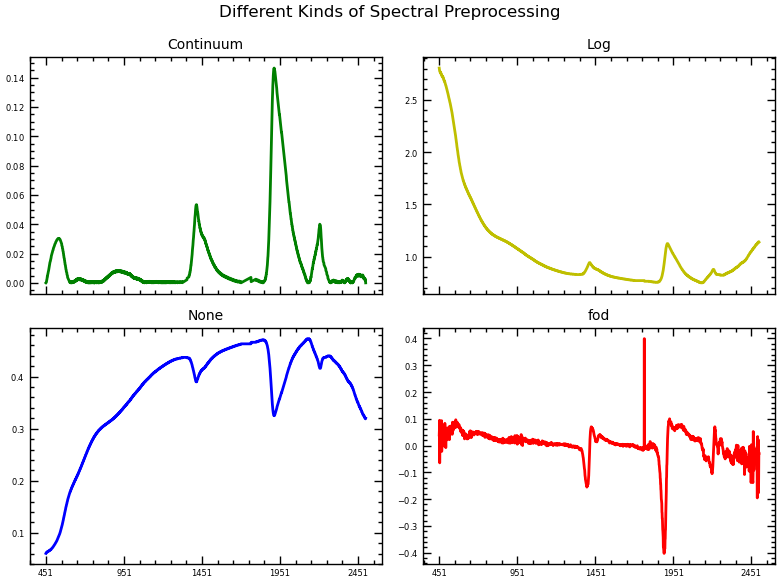

In [116]:
data = {'Continuum': sampled_cr[0].iloc[0,:].T, 'Log': sampled_log[0].iloc[0,:].T, \
        'None': sampled_spec[0].iloc[0,:].T,  'fod': 100*fod_sampled[0].iloc[21,:].T}
dfplot = pd.DataFrame(data)

#define list of subplot titles
title_list = ['Continuum', 'Log', 'None', 'fod']
dfplot.plot(kind='line', subplots=True, title=title_list, grid=False,
        layout=(2, 2), sharex=True, sharey=False, 
        style=['g', 'y', 'b', 'r'],)

for ax in plt.gcf().axes:
    ax.get_legend().remove()

    
plt.suptitle("Different Kinds of Spectral Preprocessing")
plt.tight_layout()
plt.show()
       

##### The figure drawn below shows all the different spectras resampled on 50 bands.

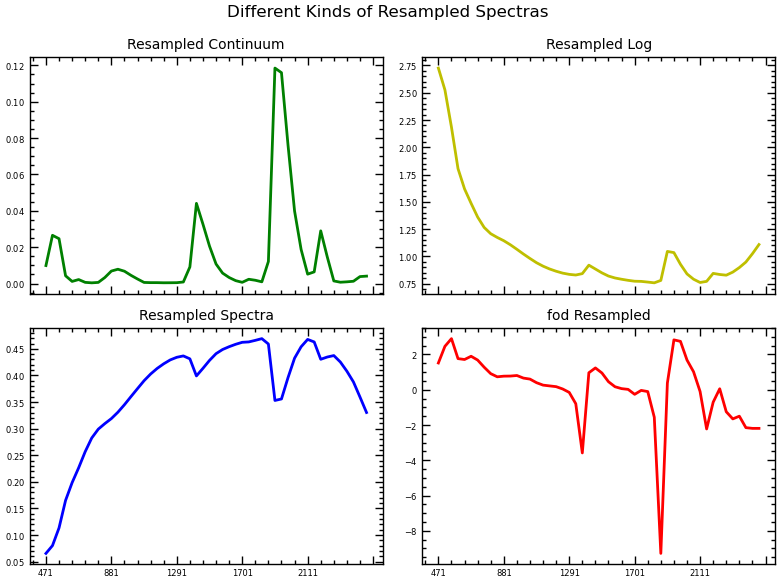

In [118]:
data1 = {'Continuum': sampled_cr[50].iloc[0,:].T, 'Log': sampled_log[50].iloc[0,:].T, \
        'None': sampled_spec[50].iloc[0,:].T,  'fod': 100*fod_sampled[50].iloc[21,:].T}
df1plot = pd.DataFrame(data1)

#define list of subplot titles
title_list = ['Resampled Continuum', 'Resampled Log', 'Resampled Spectra', 'fod Resampled']

df1plot.plot(kind='line', subplots=True, title=title_list, grid=False,
        layout=(2, 2), sharex=True, sharey=False, 
        style=['g', 'y', 'b', 'r'],)

for ax in plt.gcf().axes:
    ax.get_legend().remove()
    
# Defining Parameters
params = {
    'axes.titlesize': 10,
    'axes.labelsize': 4,
    'xtick.labelsize' : 6,
    'ytick.labelsize' : 6
}

# Updating the rcParams in Matplotlib
plt.rcParams.update(params)
plt.suptitle("Different Kinds of Resampled Spectras ", fontsize = 12)
plt.tight_layout()
plt.show()

### Correlation between Spectras and Targets

Correlation of different spectras (which were resampled on the above mentioned bands) were calculated with respect to each of the attributes. <br> See following figure for plots of correlation (of smoothed spectra) with sand, silt, clay, TOC and CaCO3.  

In [176]:
spectra.head(5)
T[0]

0     86.0281
1     88.6180
2     70.5552
3     80.8749
4     60.9456
       ...   
82    59.5654
83    59.8298
84    61.3003
85    46.6541
86    47.9004
Name: Sand, Length: 86, dtype: float64

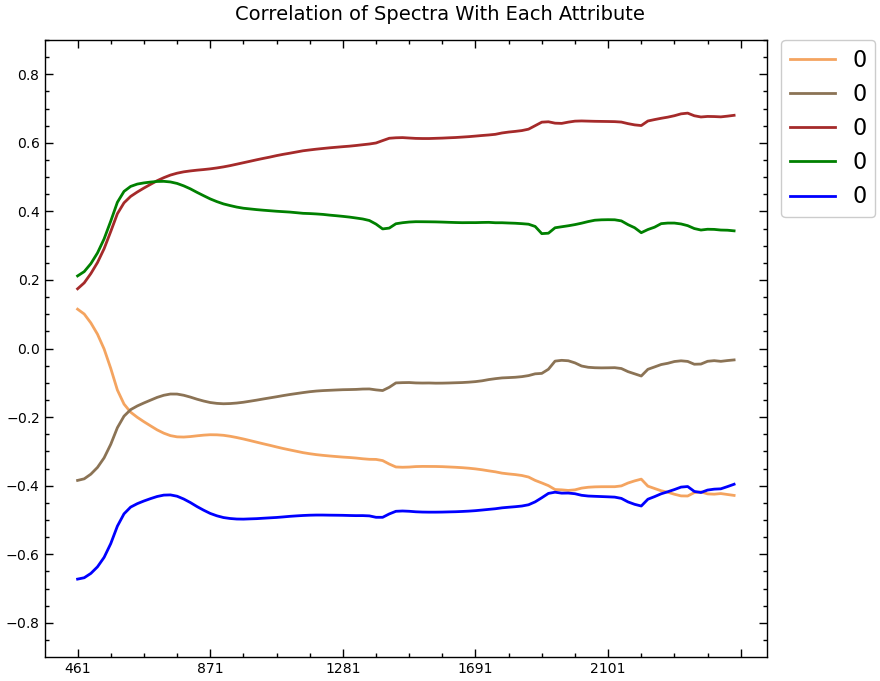

In [183]:
plt.figure(figsize=(9,7))
plt.suptitle("Correlation of Spectra With Each Attribute", fontsize = 14)

plot_corr ('Sand', 'none', 100)
plot_corr ('Silt', 'none', 100)
plot_corr ('Clay', 'none', 100)
plot_corr ('TOC', 'none', 100)
plot_corr ('CaCO3', 'none', 100)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

params = {
    
    'xtick.labelsize' : 10,
    'ytick.labelsize' : 10,
}

# Updating the rcParams in Matplotlib
plt.rcParams.update(params)
plt. grid(False)
plt.tight_layout()
plt.show()

In [178]:
spectra.head(5)
T[0]

0     86.0281
1     88.6180
2     70.5552
3     80.8749
4     60.9456
       ...   
82    59.5654
83    59.8298
84    61.3003
85    46.6541
86    47.9004
Name: Sand, Length: 86, dtype: float64

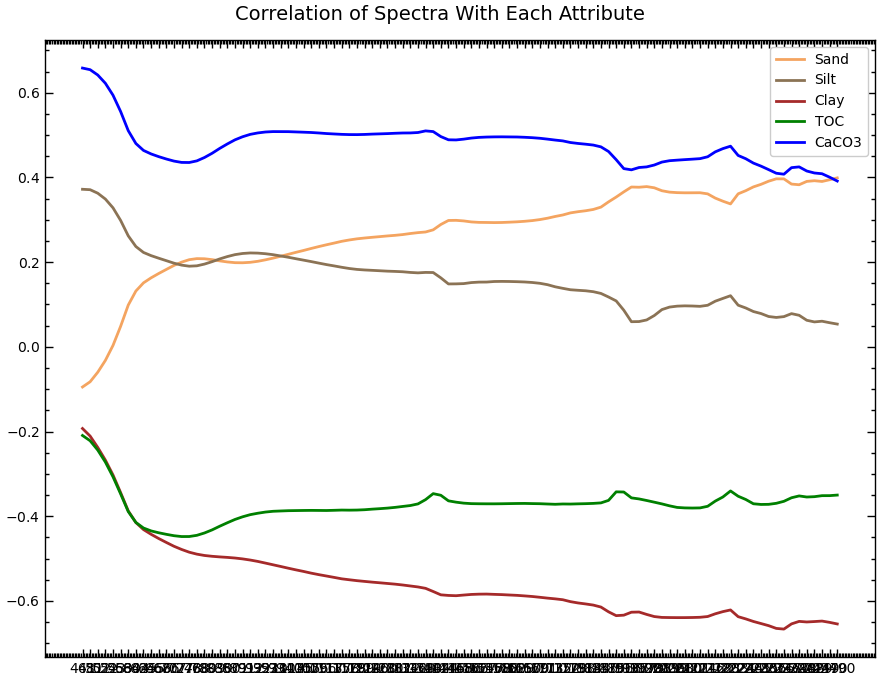

In [185]:
r_val0, p_val0 = find_rpval (resample_spectra(spec2[51], 100),T[0])
r_val1, p_val1 = find_rpval (resample_spectra(spec2[51], 100),T[1])
r_val2, p_val2 = find_rpval (resample_spectra(spec2[51], 100),T[2])
r_val3, p_val3 = find_rpval (resample_spectra(spec2[51], 100),T[3])
r_val4, p_val4 = find_rpval (resample_spectra(spec2[51], 100),T[4])

#create data
df = pd.DataFrame({'sand': r_val0.iloc[0,:], 'silt': r_val1.iloc[0,:],'clay': r_val2.iloc[0,:], \
                   'TOC': r_val3.iloc[0,:], 'CaCO3': r_val4.iloc[0,:]})

# df = pd.DataFrame({'sand': r_val0.iloc[0,:].T, 'silt': r_val1.iloc[0,:].T, 'clay': r_val2.iloc[0,:].T, \
#                    'TOC': r_val3.iloc[0,:].T, 'CaCO3': r_val4.iloc[0,:].T})



plt.figure(figsize=(9,7))
plt.suptitle("Correlation of Spectra With Each Attribute", fontsize = 14)

# #add lines to plot
plt.plot(df['sand'], label = 'Sand', color = '#F4A460')
plt.plot(df['silt'], label = 'Silt', color = '#8B7355')
plt.plot(df['clay'], label = 'Clay', color = '#A52A2A')
plt.plot(df['TOC'], label = 'TOC', color = 'green')
plt.plot(df['CaCO3'], label = 'CaCO3', color = 'blue')

#place legend in center right of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

params = {
    
    'xtick.labelsize' : 10,
    'ytick.labelsize' : 10,
}

# Updating the rcParams in Matplotlib
plt.rcParams.update(params)
plt.legend(fontsize = 10)
plt. grid(False)
plt.tight_layout()
plt.show()

### Obtaining Hypertuned Models for Each  Preprocessed Spectra

- For each preprocessed spectra a hypertuned model was obtained using MTree method.
- Calibration of models (i.e. finding hypertuned initial models) was performed using leave one out method.
- The model accuracy (of each hypertuned model) was evaluated using both train test and leave one out methods. 
- Methods used are 1. PLSR as '**plsr**', 2. KernelRidgeRegression as '**ridge**', 3. SVR  as '**svr**', 4. Cubist  as '**cubist**', and 5. GBRT as '**gbrt**'.


####  A table summarizing the results of the 5 targets produced by the different methods is presented below :

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

Best models identified for each target (corresponding to different methods) are described below.

In [5]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
feature_scores = {}
model_details ={} 

##  Sand Models

#### PLSR (sand)

##### Train test

Sand -> [ r2 - **0.67**, Spec - none, n_bands - 7]     <br/><br/>
***Description***: To obtain the best model for sand using plsr method we trained the model on the smoothed spectra which is  resampled to 7 bands.

In [6]:
sand_model_plsr = PLSRegression(n_components=5, scale=True) 
sand_model_plsr.fit(sampled_spec[7],  T[0])

PLSRegression(n_components=5)

In [7]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, sampled_spec[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'plsr', 'spec': sampled_spec[7], 'spec_proc': 'none', 'n_bands': 7}

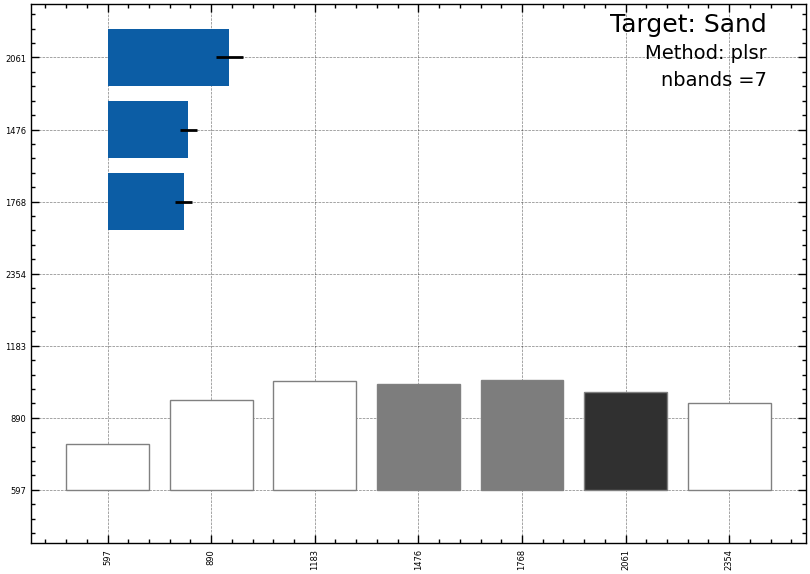

In [8]:
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 4, 2)

#### Leave one out

Sand -> [ r2 - **0.57**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for sand using plsr method we trained the model on the
 logarithmic of reflectance inverse which is resampled to 7 bands.


In [9]:
sand_model_plsr = PLSRegression(n_components=5, scale=True)  
sand_model_plsr.fit(sampled_log[7],  T[0])

PLSRegression(n_components=5)

In [10]:
feature_scores['Sand'] = permutation_importance(sand_model_plsr, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'plsr', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}

In [11]:
#show_all_important_features_for ('Sand', model_details, feature_scores, 0.005, 1, 2)

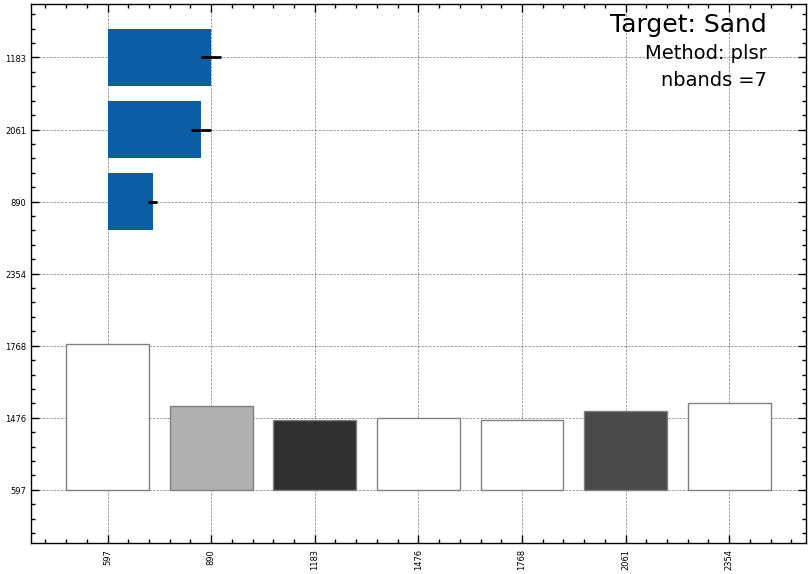

In [12]:
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 1, 2)

#### SVR (sand)

#### Train test

Sand -> [ r2 - **0.6**, Spec - log, n_bands -100]     <br/><br/>
***Description***: To obtain the best model for sand using svr method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 100 bands.

In [13]:
sand_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear') 
sand_model_svr.fit(sampled_log[100],  T[0])

SVR(C=10, gamma=0.01, kernel='linear')

In [14]:
feature_scores['Sand'] = permutation_importance(sand_model_svr, sampled_log[100], T[0], n_repeats=30, random_state=0)
model_details['Sand'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}

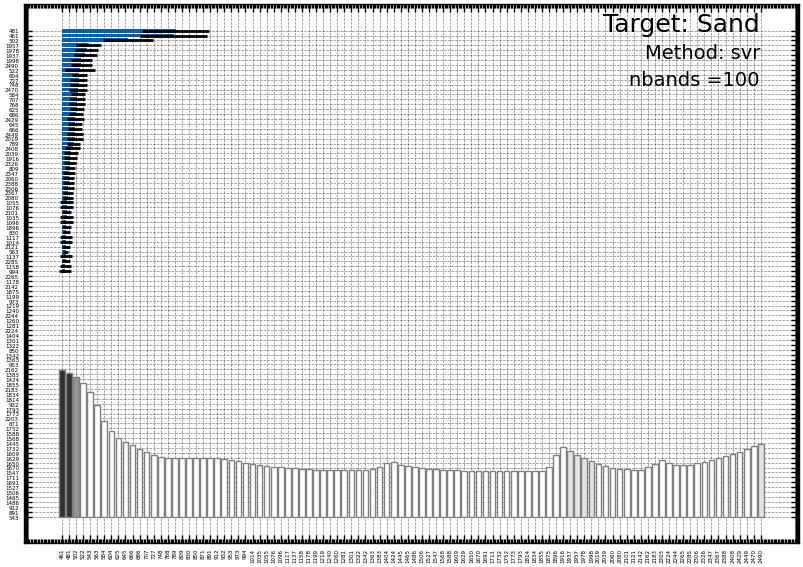

In [15]:
show_important_features_for ('Sand', model_details, feature_scores, 100, 10, 2)

#### Leave one out

Sand -> [ r2 - **0.52**, Spec - log, n_bands -100]     <br/><br/>
***Description***: To obtain the best model for sand using svr method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 100 bands.

In [16]:
sand_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear') 
sand_model_svr.fit(sampled_log[100],  T[0])

SVR(C=10, gamma=0.01, kernel='linear')

In [17]:
feature_scores['Sand'] = permutation_importance(sand_model_svr, sampled_log[100], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}

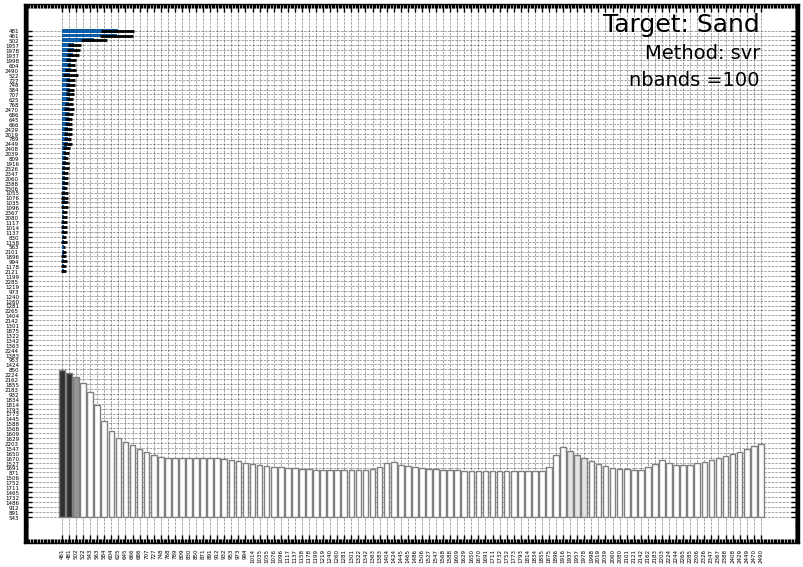

In [18]:
show_important_features_for ('Sand', model_details, feature_scores, 50, 10, 2)

### KernelRidge (sand)

#### Train test

Sand -> [ r2 - **0.6**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [19]:
sand_model_kernelridge = KernelRidge(alpha = 0.001) 
sand_model_kernelridge.fit(sampled_log[7],  T[0])

KernelRidge(alpha=0.001)

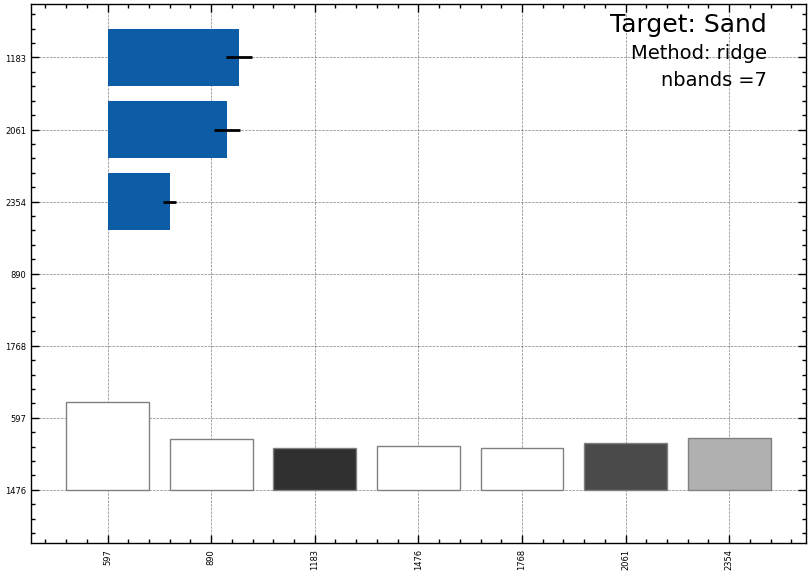

In [20]:
feature_scores['Sand'] = permutation_importance(sand_model_kernelridge, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.005, 0.6, 2)

#### Leave one out

Sand -> [ r2 - **0.55**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [21]:
sand_model_kernelridge = KernelRidge( alpha = 0.001 ) 
sand_model_kernelridge.fit(sampled_log[7],  T[0])

KernelRidge(alpha=0.001)

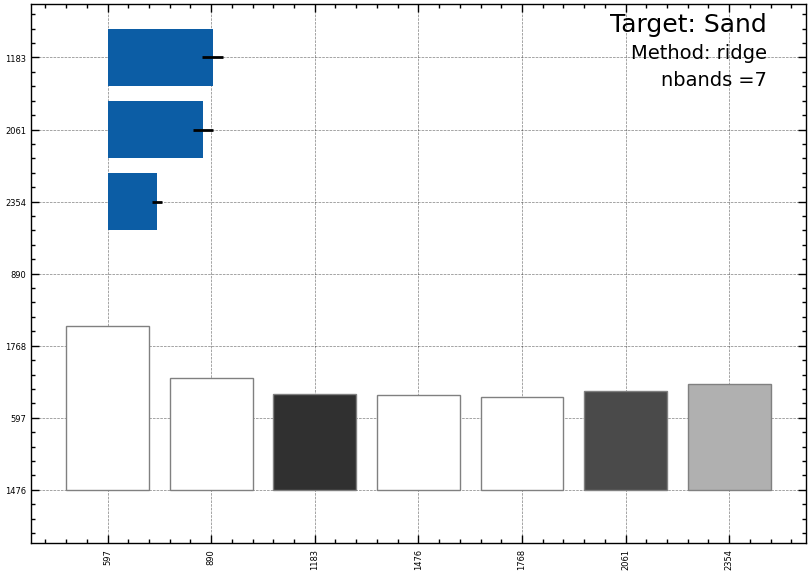

In [22]:
feature_scores['Sand'] = permutation_importance(sand_model_kernelridge, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.004, 1.5, 20)

### Cubist (sand)

####  Train test

Sand -> [ r2 - **0.62**, Spec - none, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the smoothed spectra which is  resampled to 7 bands.

In [23]:
sand_model_cubist = Cubist(n_committees = 20, n_rules = 10) 
sand_model_cubist.fit(sampled_spec[7],  T[0])

Cubist(n_committees=20, n_rules=10)

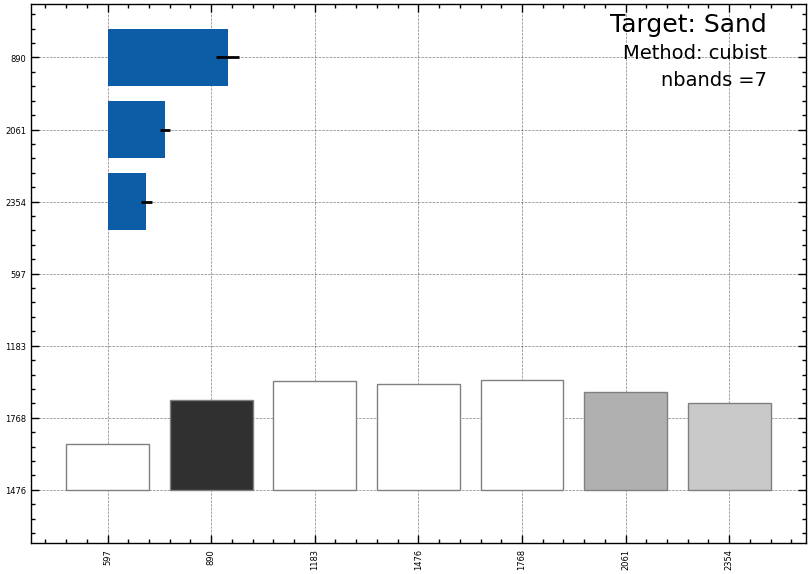

In [24]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_spec[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'cubist', 'spec': sampled_spec[7], 'spec_proc': 'none', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.3, 4, 2)

#### Leave one out

Sand -> [ r2 - **0.59**, Spec - log, n_bands -7]     <br/><br/>
***Description***: To obtain the best model for sand using cubist method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 7 bands.

In [25]:
sand_model_cubist = Cubist( n_committees = 10, n_rules = 10 ) 
sand_model_cubist.fit(sampled_log[7],  T[0])

Cubist(n_committees=10, n_rules=10)

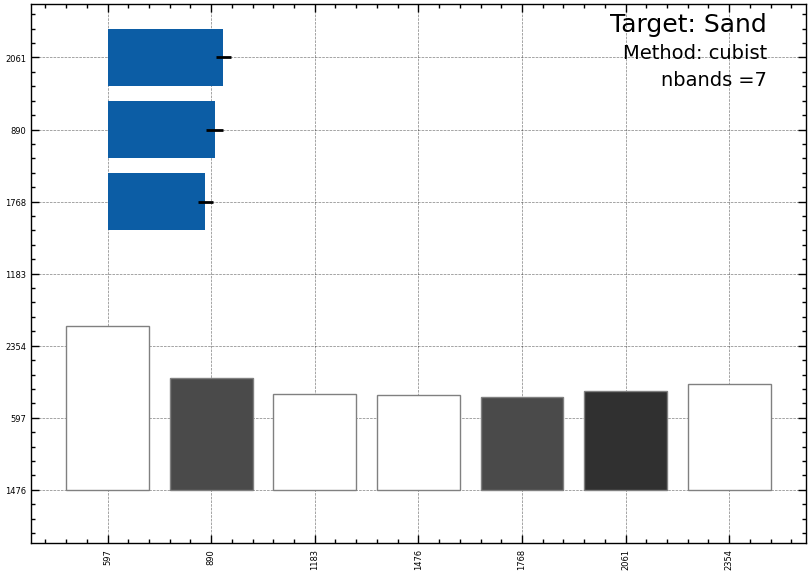

In [26]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_log[7], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'cubist', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Sand', model_details, feature_scores, 0.2, 1.5, 20)

### Gradient Boosting Regression Tree (sand)

#### Train test

Sand -> [ r2 - **0.53**, Spec - fod2, n_bands -17]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the smoothed spectra which is  resampled to 17 bands.

In [27]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 4, n_estimators = 40, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[17],  T[0])

GradientBoostingRegressor(max_depth=4, n_estimators=40, random_state=42)

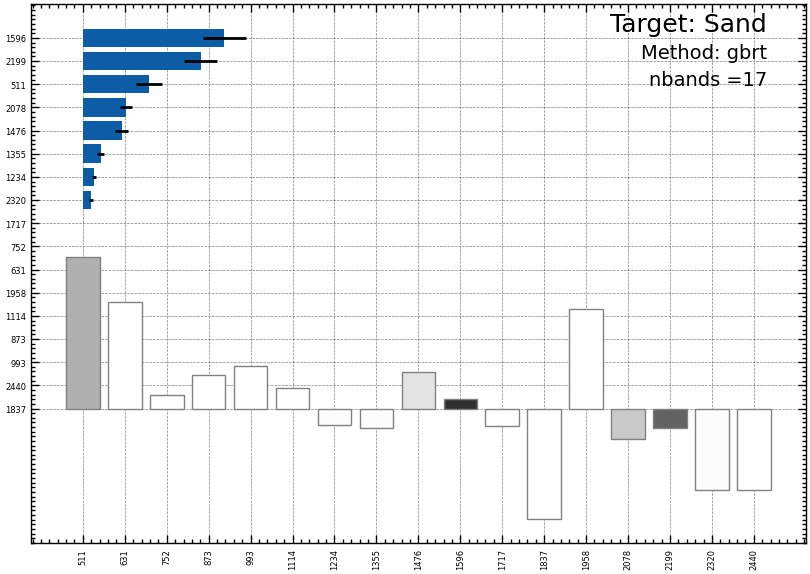

In [28]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[17], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[17], 'spec_proc': 'fod2', 'n_bands': 17}
show_important_features_for ('Sand', model_details, feature_scores, 10, 50, 2)

#### Leave one out

Sand -> [ r2 - **0.59**, Spec - fod2, n_bands -39]     <br/><br/>
***Description***: To obtain the best model for sand using gbrt method we trained the model on the first order derivative of the  smoothed spectra which is  resampled to 39 bands.

In [29]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42) 
sand_model_gbrt.fit(fod_sampled[39],  T[0])

GradientBoostingRegressor(n_estimators=50, random_state=42)

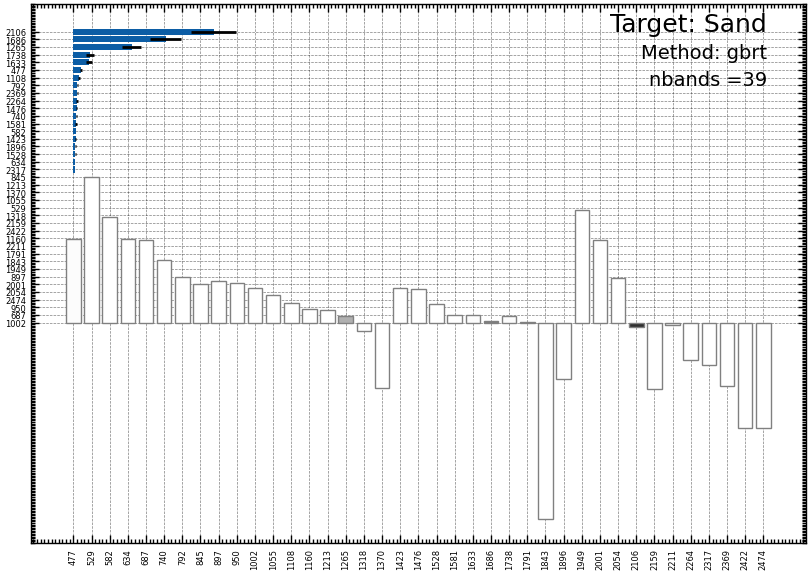

In [30]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled[39], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled[39], 'spec_proc': 'fod2', 'n_bands': 39}
show_important_features_for ('Sand', model_details, feature_scores, 20, 400, 20)

##  Silt 

### PLSR (silt)

#### Train test

Silt -> [ r2 - **0.55**, Spec - none, n_bands - 11]     <br/><br/>
***Description***: To obtain the best model for silt using plsr method we trained the model on the smoothed spectra which is  resampled to 11 bands.

In [31]:
silt_model_plsr = PLSRegression(n_components=4, scale=True) 
silt_model_plsr.fit(sampled_spec[11],  T[1])

PLSRegression(n_components=4)

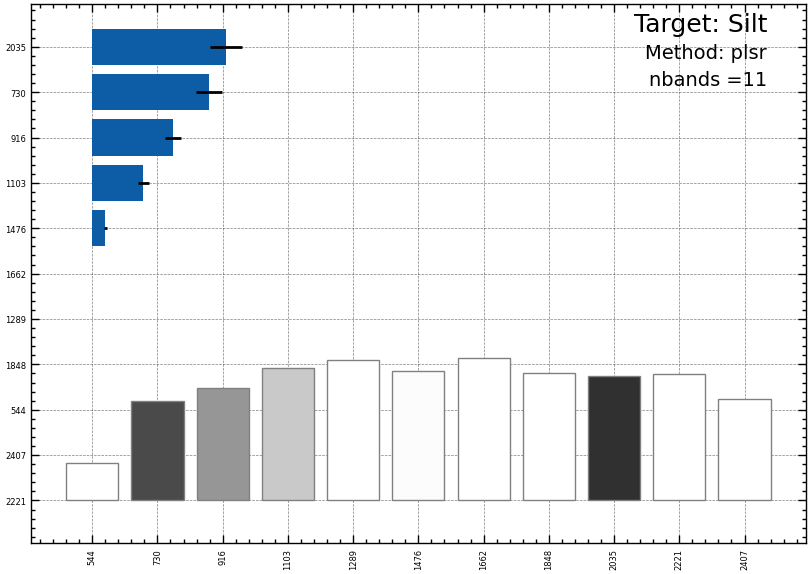

In [32]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, sampled_spec[11], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'plsr', 'spec': sampled_spec[11], 'spec_proc': 'none', 'n_bands': 11}
show_important_features_for ('Silt', model_details, feature_scores, 0.1, 8, 2)

#### Leave one out

Silt -> [ r2 - **0.35**, Spec - fod2, n_bands - 29]   <br/><br/>
***Description***:To obtain the best model for silt using plsr method we trained the model on the
 first order derivative of the smoothed spectra which is resampled to 29 bands.


In [33]:
silt_model_plsr = PLSRegression(n_components=2, scale=True)  
silt_model_plsr.fit(fod_sampled[29],  T[1])

PLSRegression()

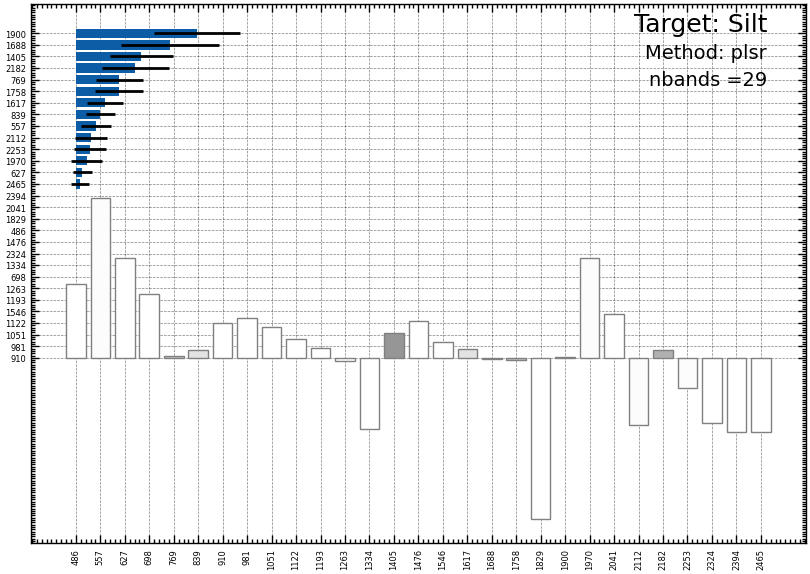

In [34]:
feature_scores['Silt'] = permutation_importance(silt_model_plsr, fod_sampled[29], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'plsr', 'spec': fod_sampled[29], 'spec_proc': 'fod2', 'n_bands': 29}
show_important_features_for ('Silt', model_details, feature_scores, 80, 140, 2)

### SVR (silt)

#### Train test

Silt -> [ r2 - **0.35**, Spec - log, n_bands -70]     <br/><br/>
***Description***: To obtain the best model for silt using svr method we trained the model on the logarithmic of the reflectance inverse spectra which is  resampled to 70 bands.

In [35]:
silt_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf') 
silt_model_svr.fit(sampled_log[70],  T[1])

SVR(C=10, gamma=1)

In [36]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log[70], T[1], n_repeats=20, random_state=0)

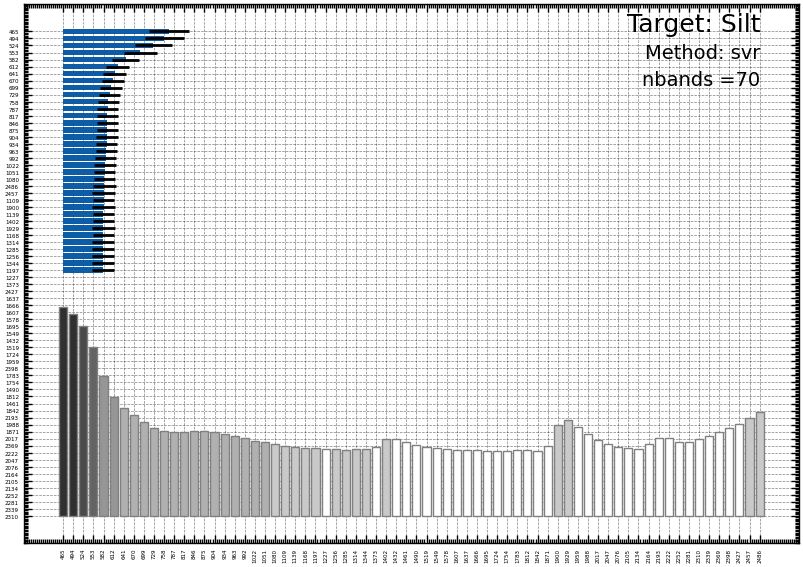

In [37]:
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('Silt', model_details, feature_scores, 40, 10, 2)

#### Leave one out

Silt-> [ r2 - **0.31**, Spec - log, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for silt using svr method we trained the model on the
 logarithmic of the reflectance inverse spectra which is resampled to 90 bands.


In [38]:
silt_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf') 
silt_model_svr.fit(sampled_log[90],  T[1])

SVR(C=10, gamma=1)

In [39]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log[90], T[1], n_repeats=20, random_state=0)

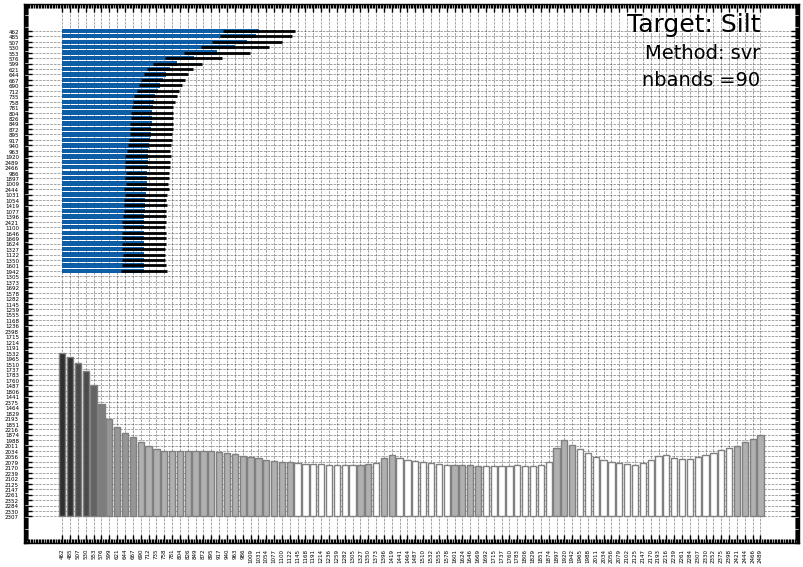

In [40]:
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log[90], 'spec_proc': 'log', 'n_bands': 90}
show_important_features_for ('Silt', model_details, feature_scores.copy(), 100, 10, 2)

###  Kernel Ridge (silt)

#### Train test

Silt -> [ r2 - **0.41**, Spec - none, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for silt using kernel ridge regression method we trained the model on the
 smoothed spectra which is resampled to 7 bands.


In [41]:
silt_model_kernelridge = KernelRidge(alpha = 0.0001) 
silt_model_kernelridge.fit(sampled_spec[7],  T[1])

KernelRidge(alpha=0.0001)

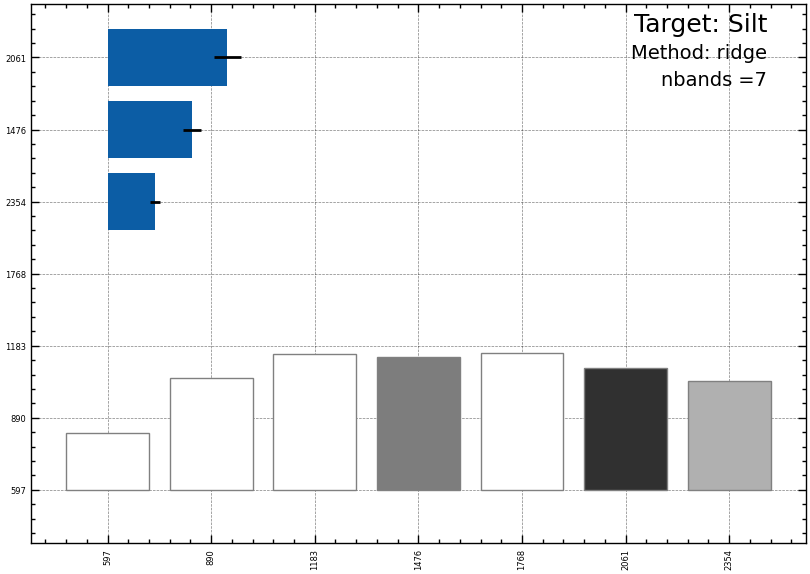

In [42]:
feature_scores['Silt'] = permutation_importance(silt_model_kernelridge, sampled_spec[7], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'ridge', 'spec': sampled_spec[7], 'spec_proc': 'none', 'n_bands': 7}
show_important_features_for ('Silt', model_details, feature_scores, 0.003, 5, 2)

#### Leave one out

Silt -> [ r2 - **0.32**, Spec - none, n_bands - 5]   <br/><br/>
***Description***:To obtain the best model for silt using kernel ridge regression method  we trained the model on the
 smoothed spectra which is resampled to 5 bands.


In [43]:
silt_model_kernelridge = KernelRidge( alpha = 0.00005) 
silt_model_kernelridge.fit(sampled_spec[5],  T[1])

KernelRidge(alpha=5e-05)

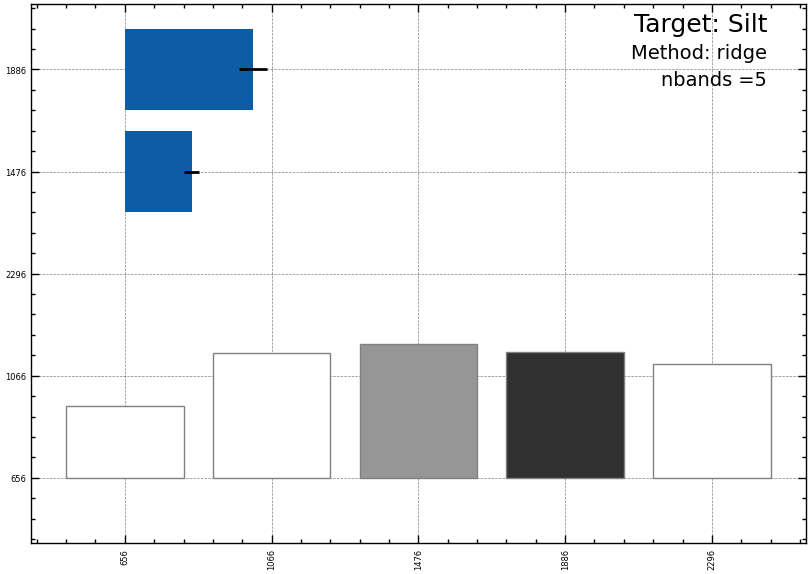

In [44]:
feature_scores['Silt'] = permutation_importance(silt_model_kernelridge, sampled_spec[5], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'ridge', 'spec': sampled_spec[5], 'spec_proc': 'none', 'n_bands': 5}
show_important_features_for ('Silt', model_details, feature_scores, 0.001, 3.5, 2)

### Cubist (silt)

#### Train test

Silt -> [ r2 - **0.41**, Spec - fod2, n_bands - 5]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the
 smoothed spectra which is resampled to 5 bands.


In [45]:
silt_model_cubist = Cubist( n_committees = 5, n_rules = 10) 
silt_model_cubist.fit(fod_sampled[5],  T[1])

Cubist(n_committees=5, n_rules=10)

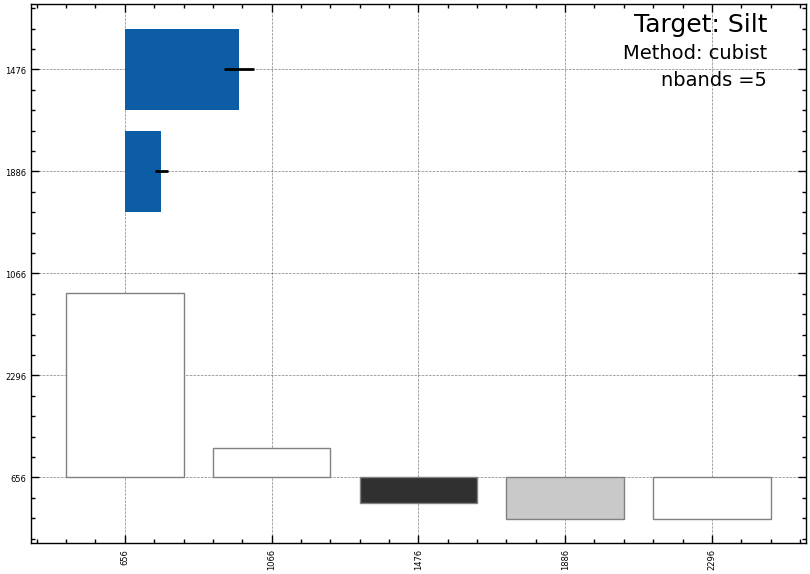

In [46]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled[5], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled[5], 'spec_proc': 'fod2', 'n_bands': 5}
show_important_features_for ('Silt', model_details, feature_scores, 0.4, 12, 2)

#### Leave one out

Silt -> [ r2 - **0.42**, Spec - fod2, n_bands - 37]   <br/><br/>
***Description***:To obtain the best model for silt using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 37 bands.


In [47]:
silt_model_cubist = Cubist(n_committees = 10, n_rules = 10) 
silt_model_cubist.fit(fod_sampled[37],  T[1])

Cubist(n_committees=10, n_rules=10)

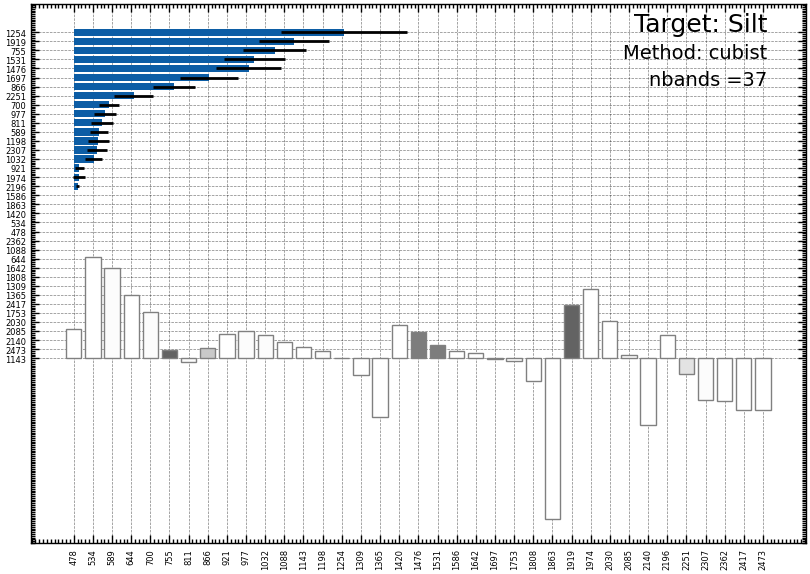

In [48]:
feature_scores['Silt'] = permutation_importance(silt_model_cubist, fod_sampled[37], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'cubist', 'spec': fod_sampled[37], 'spec_proc': 'fod2', 'n_bands': 37}
show_important_features_for ('Silt', model_details, feature_scores, 40, 150, 2)

### Gradient Boosting Regression Tree (silt)

#### Train test

Silt -> [ r2 - **0.54**, Spec - fod2, n_bands - 19]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 19 bands.


In [49]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled[19],  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

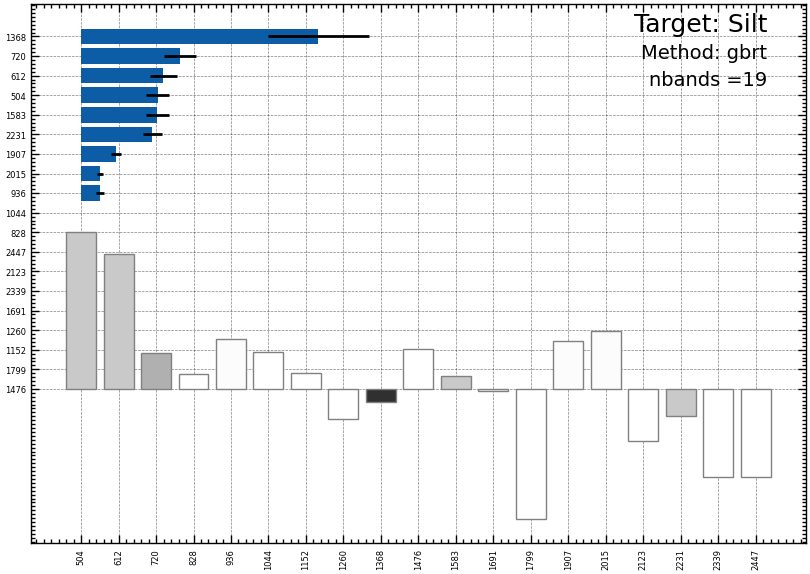

In [50]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled[19], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled[19], 'spec_proc': 'fod2', 'n_bands': 19}
show_important_features_for ('Silt', model_details, feature_scores, 20, 70, 2)

#### Leave one out

Silt -> [ r2 - **0.42**, Spec - fod2, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for silt using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 70 bands.


In [51]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)  
silt_model_gbrt.fit(fod_sampled[70],  T[1])

GradientBoostingRegressor(n_estimators=50, random_state=42)

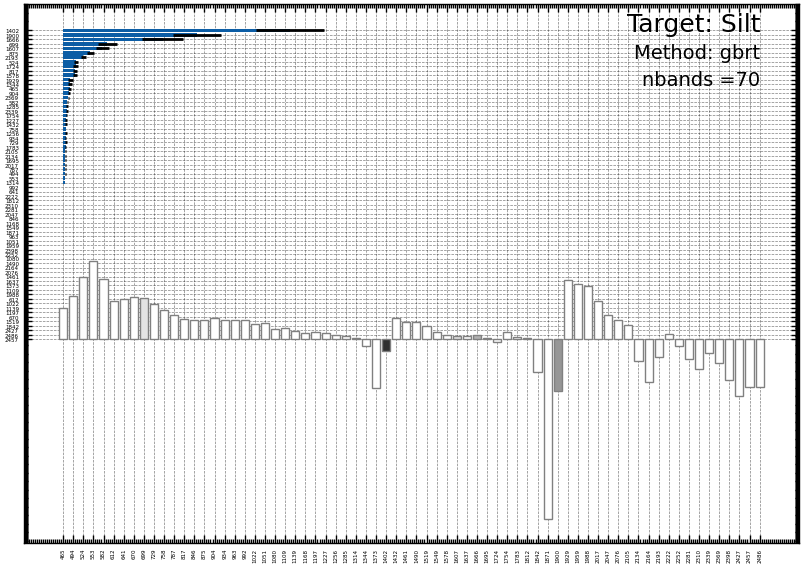

In [52]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled[70], T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled[70], 'spec_proc': 'fod2', 'n_bands': 70}
show_important_features_for ('Silt', model_details, feature_scores, 80, 600, 20)

## Clay 

### PLSR (clay)

#### Train test

Clay -> [ r2 - **0.72**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.

In [53]:
clay_model_plsr = PLSRegression(n_components=4, scale=True) 
clay_model_plsr.fit(sampled_log[39],  T[2])

PLSRegression(n_components=4)

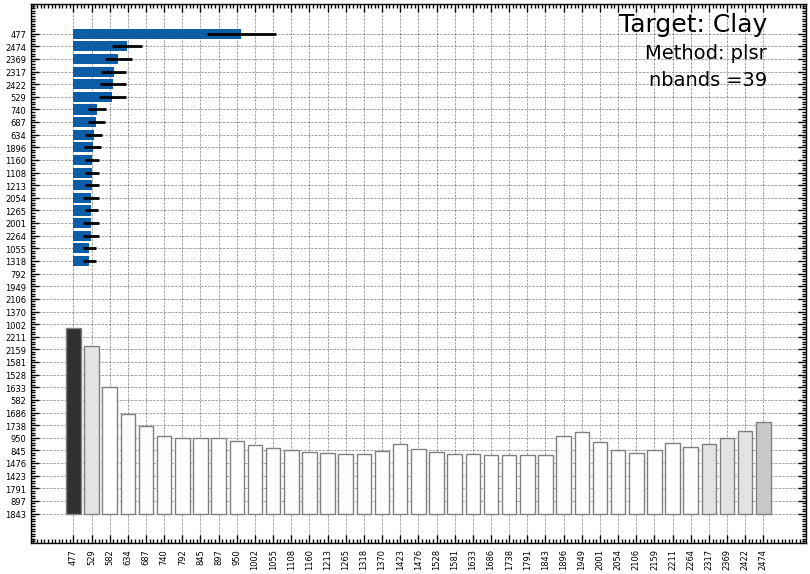

In [54]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log[39], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('Clay', model_details, feature_scores, 20, 5, 2)

#### Leave one out

Clay -> [ r2 - **0.66**, Spec - log, n_bands - 15]   <br/><br/>
***Description***:To obtain the best model for clay using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 15 bands.


In [55]:
clay_model_plsr = PLSRegression(n_components=10, scale=True)  
clay_model_plsr.fit(sampled_log[15],  T[2])

PLSRegression(n_components=10)

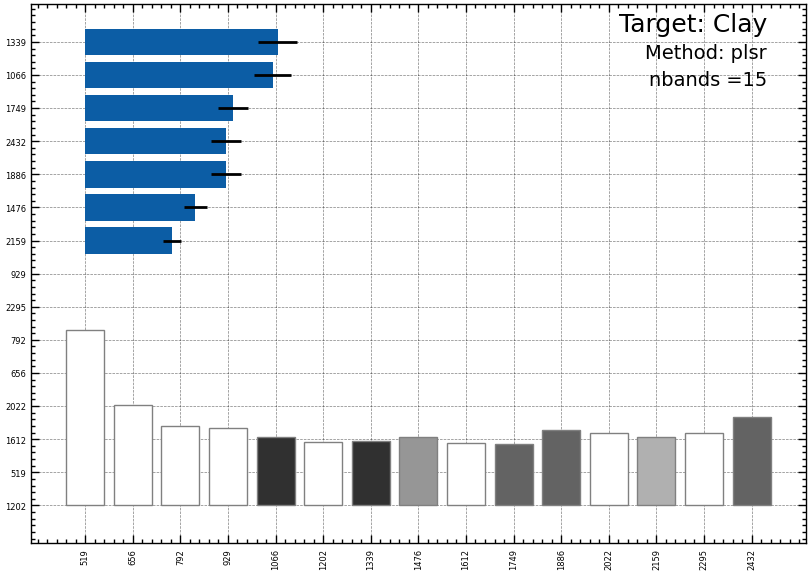

In [56]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log[15], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}
show_important_features_for ('Clay', model_details, feature_scores, 0.007, 2, 2)

### SVR (clay)

#### Train test

Clay -> [ r2 - **0.68**, Spec - log, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for clay using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 70 bands.


In [57]:
clay_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')  
clay_model_svr.fit(sampled_log[70],  T[2])

SVR(C=10, gamma=0.01, kernel='linear')

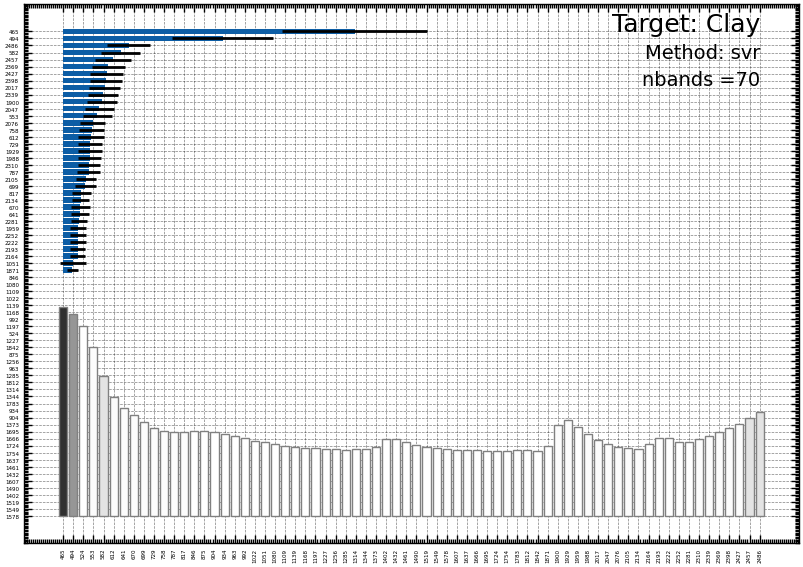

In [58]:
feature_scores['Clay'] = permutation_importance(clay_model_svr, sampled_log[70], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'svr', 'spec': sampled_log[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('Clay', model_details, feature_scores, 100, 10, 2)

#### Leave one out

Clay -> [ r2 - **0.63**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for clay using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


The best result is on 0 bands but the feature importance is plotted for 100 bands.

In [59]:
clay_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear') 
clay_model_svr.fit(sampled_log[100],  T[2])

SVR(C=10, gamma=0.01, kernel='linear')

In [60]:
feature_scores['Clay'] = permutation_importance(clay_model_svr, sampled_log[100], T[2], n_repeats=5, random_state=0)
model_details['Clay'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}

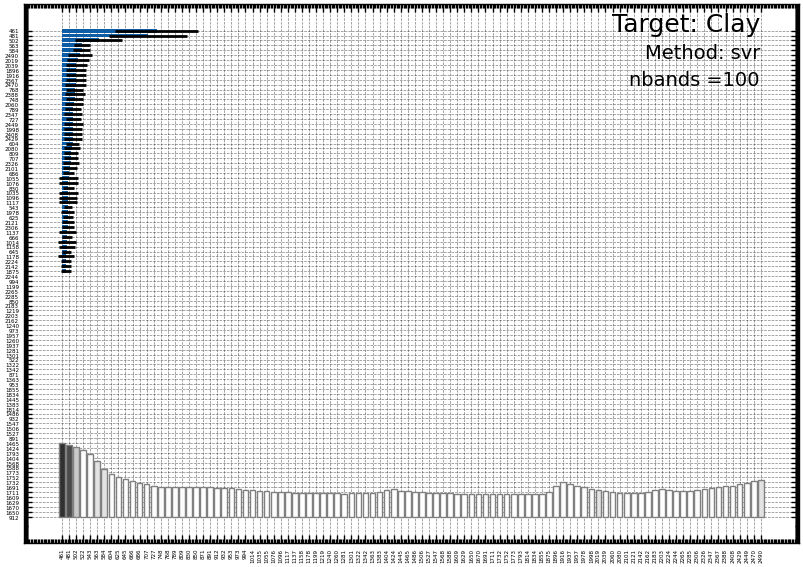

In [61]:
show_important_features_for ('Clay', model_details, feature_scores, 100, 5, 2)

### Kernel Ridge (clay)

#### Train test

Clay -> [ r2 - **0.72**, Spec - log, n_bands - 9]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 9 bands.


In [62]:
clay_model_kernelridge = KernelRidge(alpha = 0.05) 
clay_model_kernelridge.fit(sampled_log[9],  T[2])

KernelRidge(alpha=0.05)

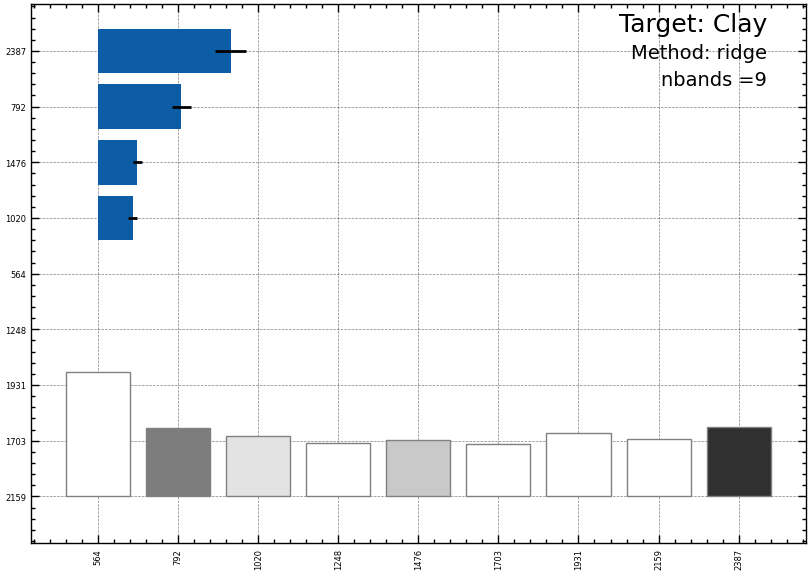

In [63]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log[9], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_log[9], 'spec_proc': 'log', 'n_bands': 9}
show_important_features_for ('Clay', model_details, feature_scores, 0.3, 1, 2)

#### Leave one out

Clay -> [ r2 - **0.6**, Spec - log, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for clay using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 90 bands.


In [64]:
clay_model_kernelridge = KernelRidge(alpha = 0.1) 
clay_model_kernelridge.fit(sampled_log[90],  T[2])

KernelRidge(alpha=0.1)

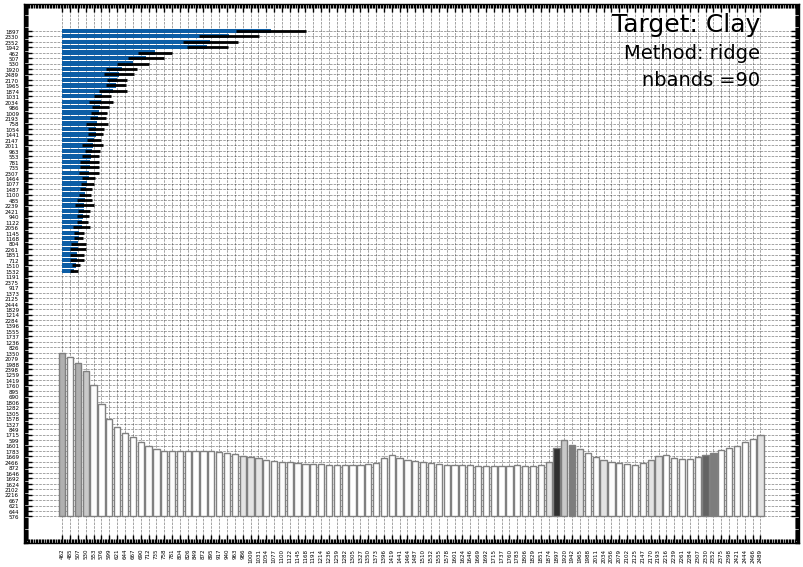

In [65]:
feature_scores['Clay'] = permutation_importance(clay_model_kernelridge, sampled_log[90], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'ridge', 'spec': sampled_log[90], 'spec_proc': 'log', 'n_bands': 90}
show_important_features_for ('Clay', model_details, feature_scores, 40, 10, 2)

### Cubist (clay)

#### Train test

Clay -> [ r2 - **0.72**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 7 bands.


In [66]:
clay_model_cubist = Cubist( n_committees = 5, n_rules = 10)
clay_model_cubist.fit(sampled_log[7],  T[2])

Cubist(n_committees=5, n_rules=10)

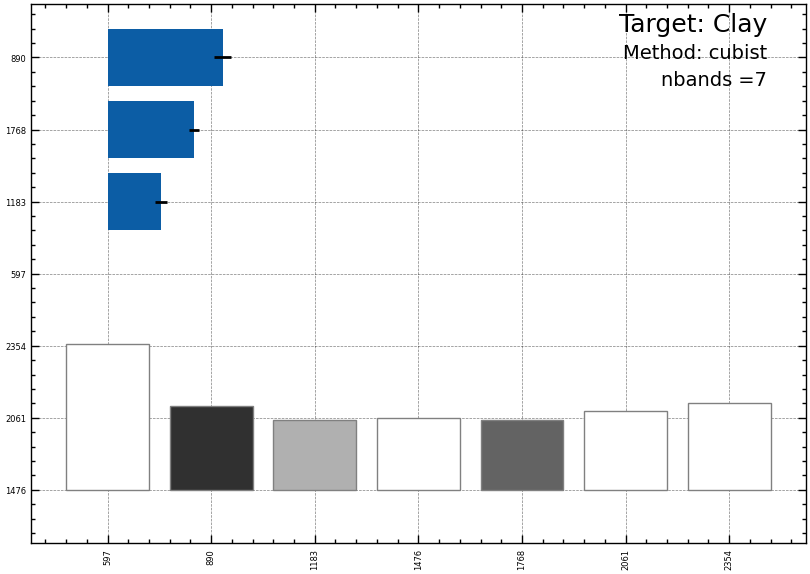

In [67]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, sampled_log[7], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('Clay', model_details, feature_scores, 0.2, 1, 2)

#### Leave one out

Clay -> [ r2 - **0.67**, Spec - log, n_bands - 21]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 21 bands.


In [68]:
clay_model_cubist = Cubist( n_committees = 10, n_rules = 10)
clay_model_cubist.fit(sampled_log[21],  T[2])

Cubist(n_committees=10, n_rules=10)

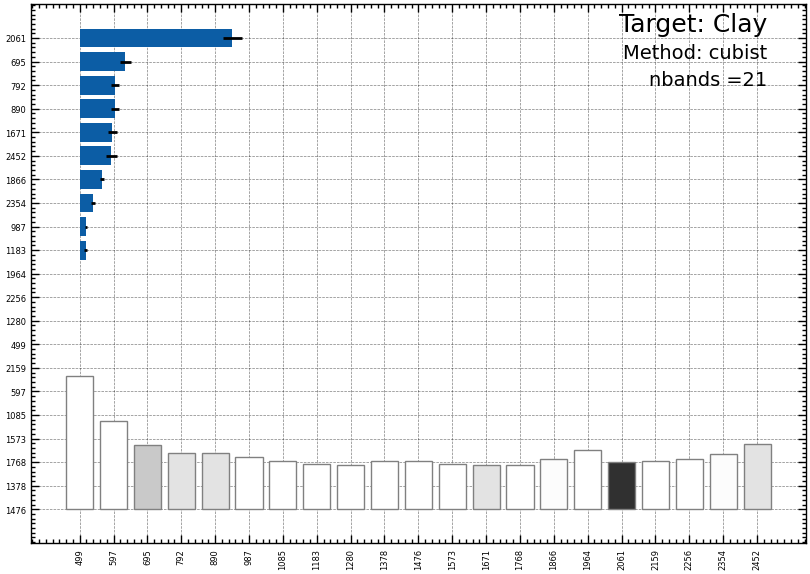

In [69]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, sampled_log[21], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': sampled_log[21], 'spec_proc': 'log', 'n_bands': 21}
show_important_features_for ('Clay', model_details, feature_scores, 1, 2, 2)

### Gradient Boosting Regression Tree (clay)

#### Train test

Clay -> [ r2 - **0.64**, Spec - fod2, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for clay using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 7 bands.


In [70]:
clay_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 50, random_state = 42)
clay_model_gbrt.fit(fod_sampled[7],  T[2])

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)

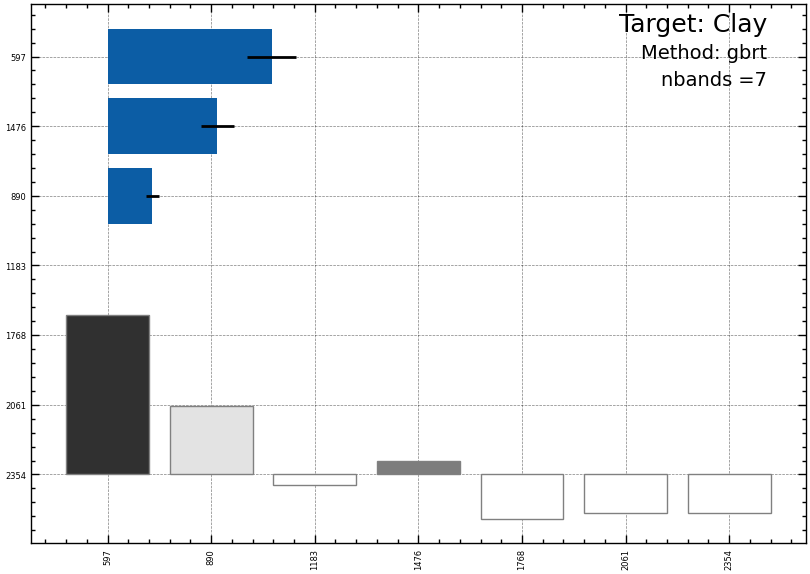

In [71]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, fod_sampled[7], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'gbrt', 'spec': fod_sampled[7], 'spec_proc': 'fod2', 'n_bands': 7}
show_important_features_for ('Clay', model_details, feature_scores, 2, 15, 2)

#### Leave one out

Clay -> [ r2 - **0.63**, Spec - fod2, n_bands - 90]   <br/><br/>
***Description***:To obtain the best model for clay using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 90 bands.


In [72]:
clay_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
clay_model_gbrt.fit(fod_sampled[90],  T[2])

GradientBoostingRegressor(n_estimators=50, random_state=42)

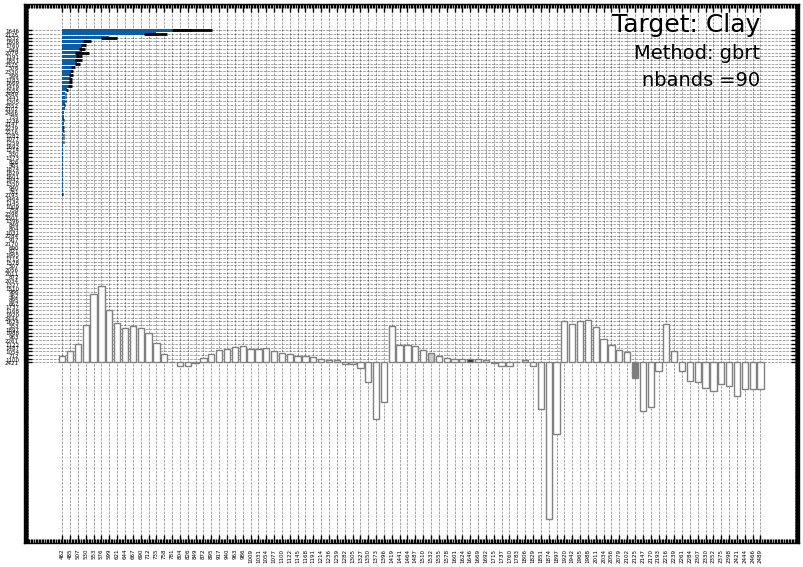

In [73]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, fod_sampled[90], T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'gbrt', 'spec': fod_sampled[90], 'spec_proc': 'fod2', 'n_bands': 90}
show_important_features_for ('Clay', model_details, feature_scores, 100, 500, 2)

## Total Organic Content (TOC)

### PLSR (TOC)

#### Train test

TOC -> [ r2 - **0.6**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for TOC using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.


In [74]:
TOC_model_plsr = PLSRegression(n_components=10, scale=True)
TOC_model_plsr.fit(sampled_log[39],  T[3])

PLSRegression(n_components=10)

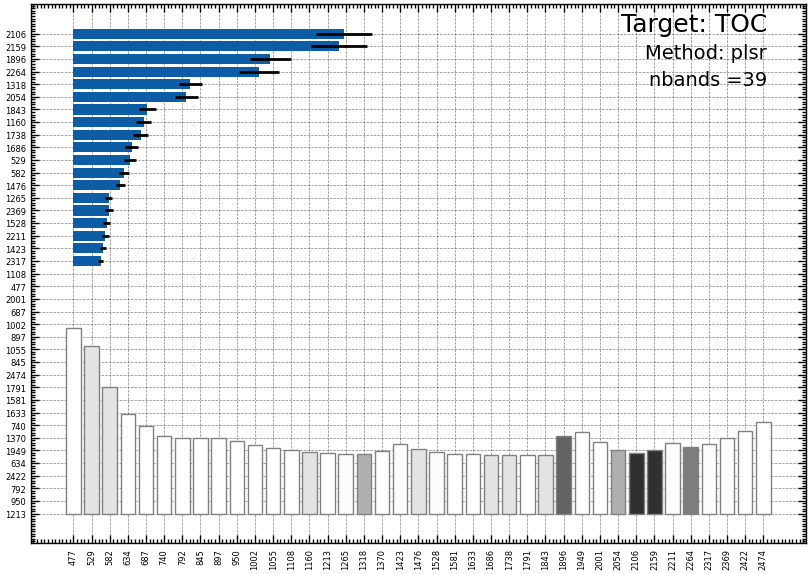

In [75]:
feature_scores['TOC'] = permutation_importance(TOC_model_plsr, sampled_log[39], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'plsr', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('TOC', model_details, feature_scores, 0.1, 5, 2)

#### Leave one out

TOC -> [ r2 - **0.44**, Spec - log, n_bands - 25]   <br/><br/>
***Description***:To obtain the best model for TOC using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 25 bands.


In [76]:
TOC_model_plsr = PLSRegression(n_components=10, scale=True)
TOC_model_plsr.fit(sampled_log[25],  T[3])

PLSRegression(n_components=10)

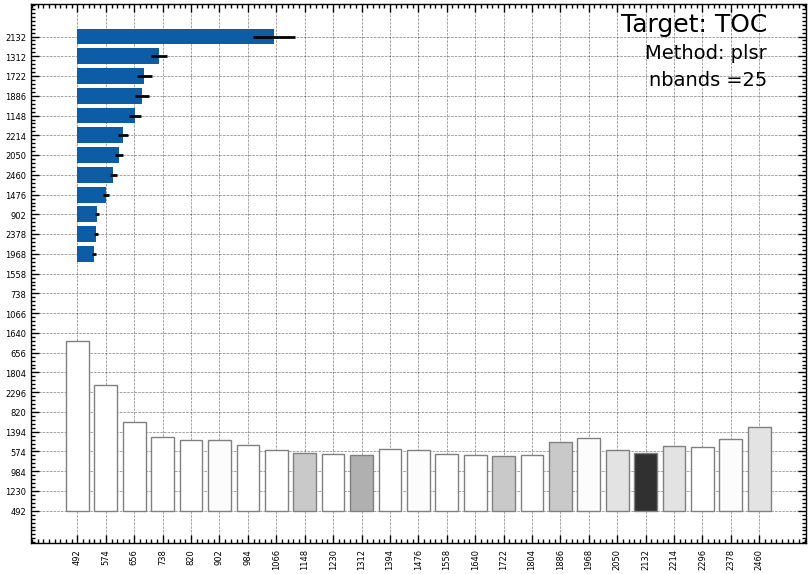

In [77]:
feature_scores['TOC'] = permutation_importance(TOC_model_plsr, sampled_log[25], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'plsr', 'spec': sampled_log[25], 'spec_proc': 'log', 'n_bands': 25}
show_important_features_for ('TOC', model_details, feature_scores, 0.01, 3, 2)

### SVR (TOC)

#### Train test

TOC -> [ r2 - **0.58**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [78]:
TOC_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
TOC_model_svr.fit(sampled_log[100],  T[3])

SVR(C=10, gamma=0.01, kernel='linear')

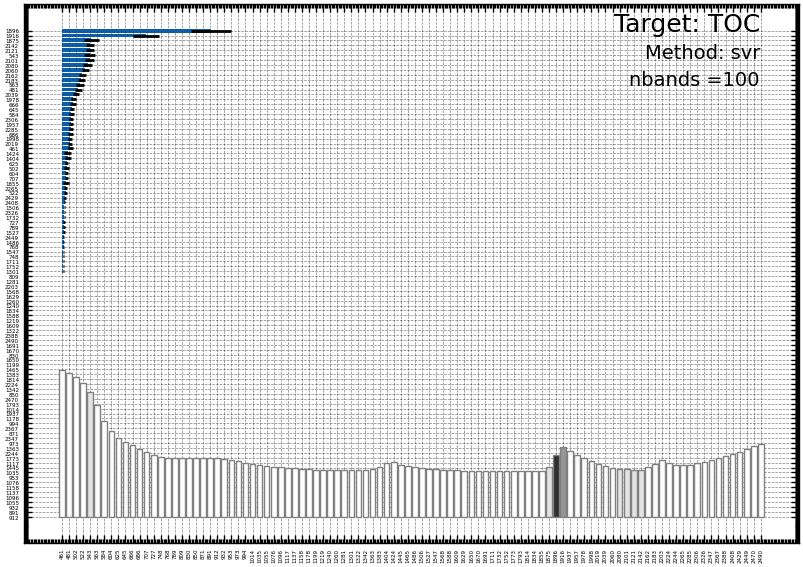

In [79]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 10,10, 2)

#### Leave one out

TOC -> [ r2 - **0.45**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [80]:
TOC_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
TOC_model_svr.fit(sampled_log[100],  T[3])

SVR(C=10, gamma=0.01, kernel='linear')

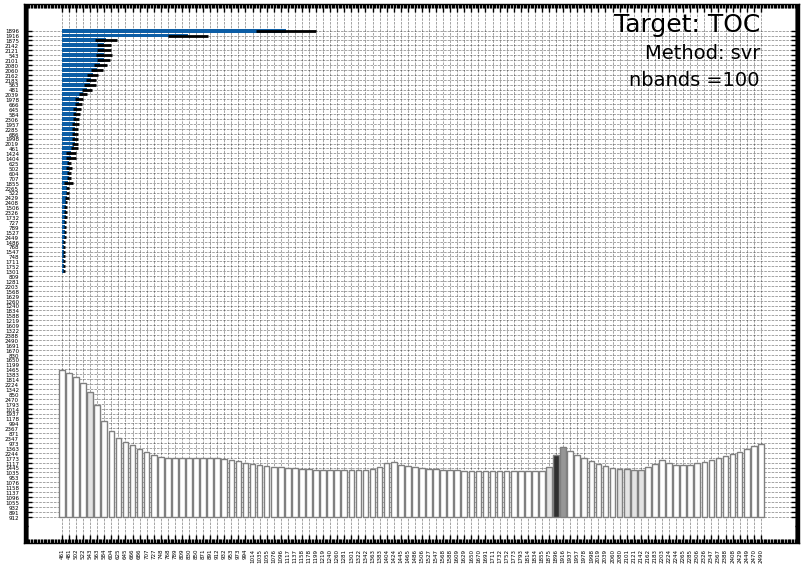

In [81]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 15, 10, 2)

###  Kernel Ridge (TOC)

#### Train test

TOC -> [ r2 - **0.6**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using kernel ridge regression  method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [82]:
TOC_model_kernelridge = KernelRidge(alpha = 0.05) 
TOC_model_kernelridge.fit(sampled_log[100],  T[3])

KernelRidge(alpha=0.05)

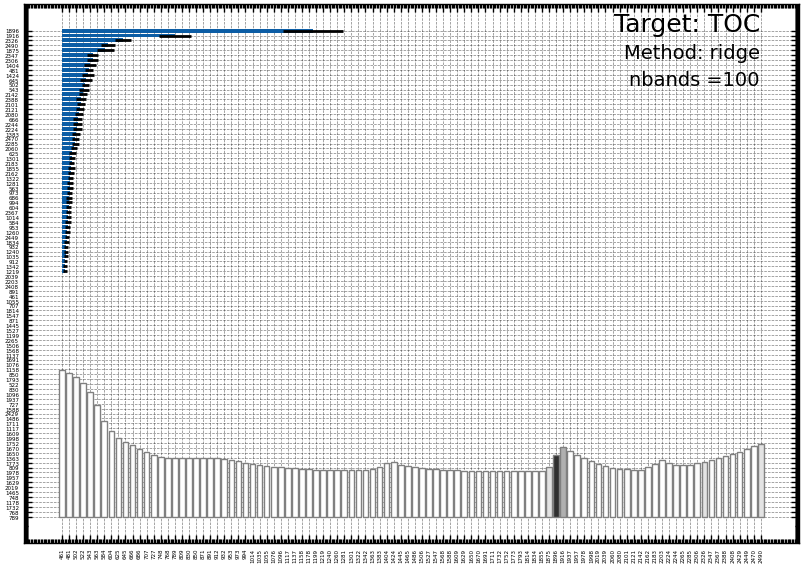

In [83]:
feature_scores['TOC'] = permutation_importance(TOC_model_kernelridge, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'ridge', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 10, 10, 2)

#### Leave one out

TOC -> [ r2 - **0.45**, Spec - log, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 0 bands.


In [84]:
TOC_model_kernelridge = KernelRidge(alpha = 0.05) 
TOC_model_kernelridge.fit(sampled_log[100],  T[3])

KernelRidge(alpha=0.05)

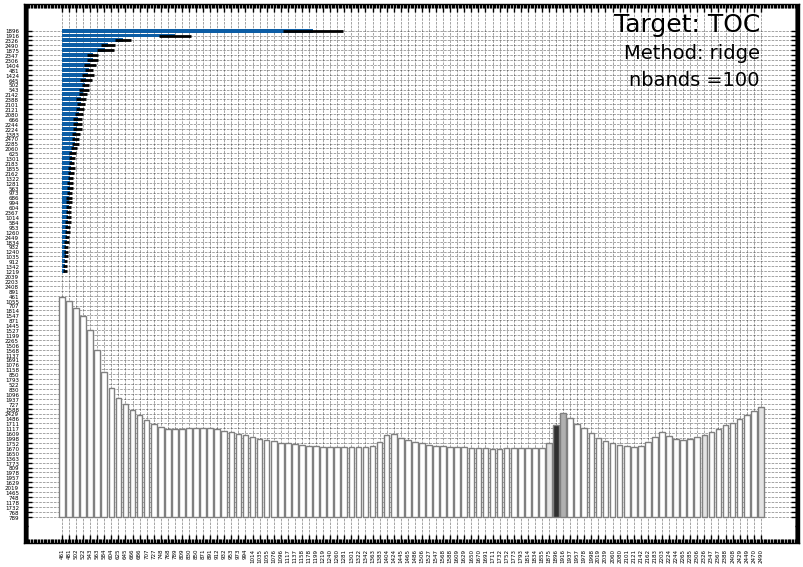

In [85]:
feature_scores['TOC'] = permutation_importance(TOC_model_kernelridge, sampled_log[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'ridge', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('TOC', model_details, feature_scores, 10, 15, 2)

### Cubist (TOC)

#### Train test

TOC -> [ r2 - **0.62**, Spec - fod2, n_bands - 45]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the first order derivative of the  smoothed spectra which is resampled to 45 bands.


In [86]:
TOC_model_cubist = Cubist(n_committees = 5, n_rules = 10) 
TOC_model_cubist.fit(fod_sampled[45],  T[3])

Cubist(n_committees=5, n_rules=10)

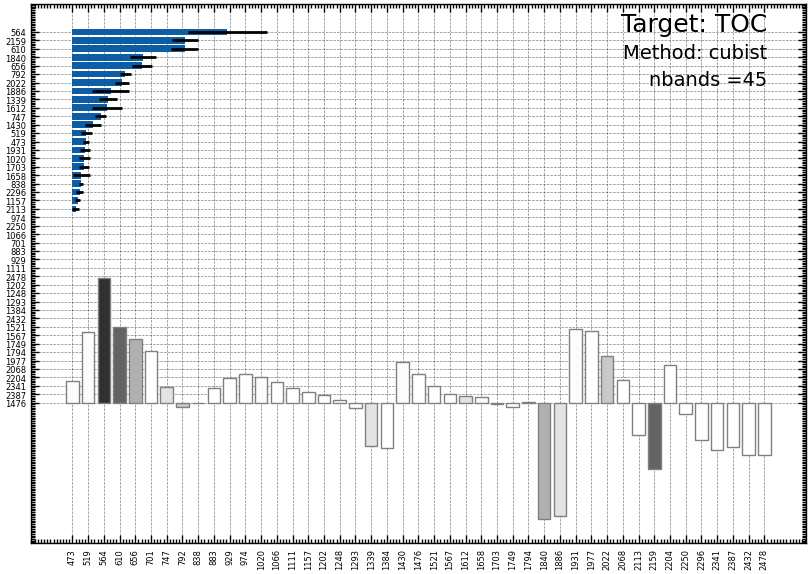

In [87]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, fod_sampled[45], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': fod_sampled[45], 'spec_proc': 'fod2', 'n_bands': 45}
show_important_features_for ('TOC', model_details, feature_scores, 30, 200, 2)

#### Leave one out

TOC -> [ r2 - **0.5**, Spec - log, n_bands - 39]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 39 bands.


In [88]:
TOC_model_cubist = Cubist(n_committees = 5, n_rules = 10)
TOC_model_cubist.fit(sampled_log[39],  T[3])

Cubist(n_committees=5, n_rules=10)

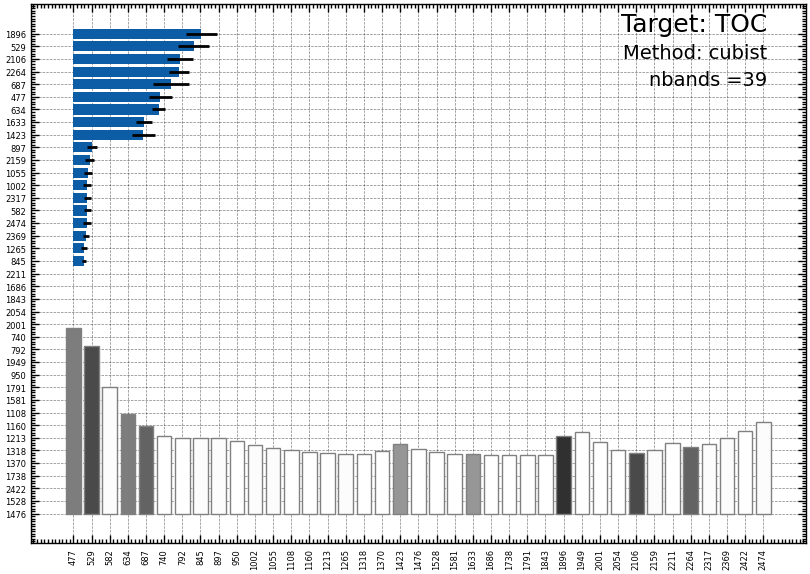

In [89]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, sampled_log[39], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': sampled_log[39], 'spec_proc': 'log', 'n_bands': 39}
show_important_features_for ('TOC', model_details, feature_scores, 10, 5, 2)

### Gradient Boosting Regression Tree (TOC)

#### Train test

TOC -> [ r2 - **0.64**, Spec - none, n_bands - 0]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the smoothed spectra which is resampled to 0 bands.


In [90]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(sampled_spec[100],  T[3])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [91]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, sampled_spec[100], T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': sampled_spec[100], 'spec_proc': 'none', 'n_bands': 100}

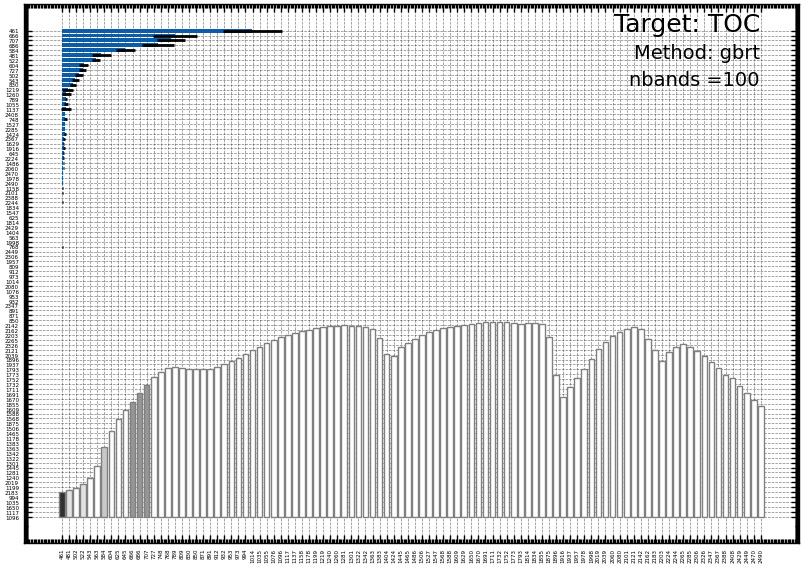

In [92]:
show_important_features_for ('TOC', model_details, feature_scores, 100, 100, 2)

#### Leave one out

TOC -> [ r2 - **0.54**, Spec - fod2, n_bands - 50]   <br/><br/>
***Description***:To obtain the best model for TOC using gbrt method we trained the model on the first order derivative of the  smoothed spectra which is resampled to 50 bands.


In [93]:
TOC_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42)
TOC_model_gbrt.fit(fod_sampled[50],  T[3])

GradientBoostingRegressor(n_estimators=30, random_state=42)

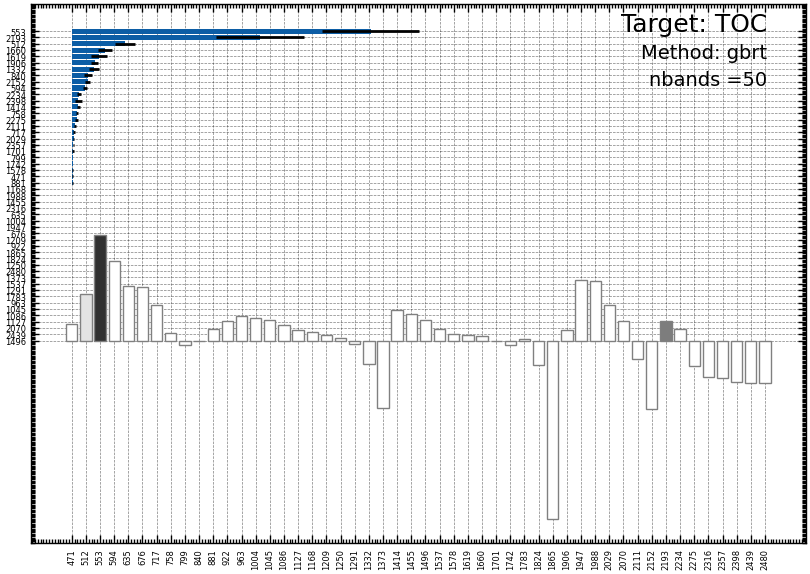

In [94]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[50], T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[50], 'spec_proc': 'fod2', 'n_bands': 50}
show_important_features_for ('TOC', model_details, feature_scores, 40, 250, 2)

## CaCO3

### PLSR (CaCO3)

#### Train test

CaCO3 -> [ r2 - **0.67**, Spec - log, n_bands - 7]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 7 bands.


In [95]:
CaCO3_model_plsr = PLSRegression(n_components=5, scale=True)
CaCO3_model_plsr.fit(sampled_log[7],  T[4])

PLSRegression(n_components=5)

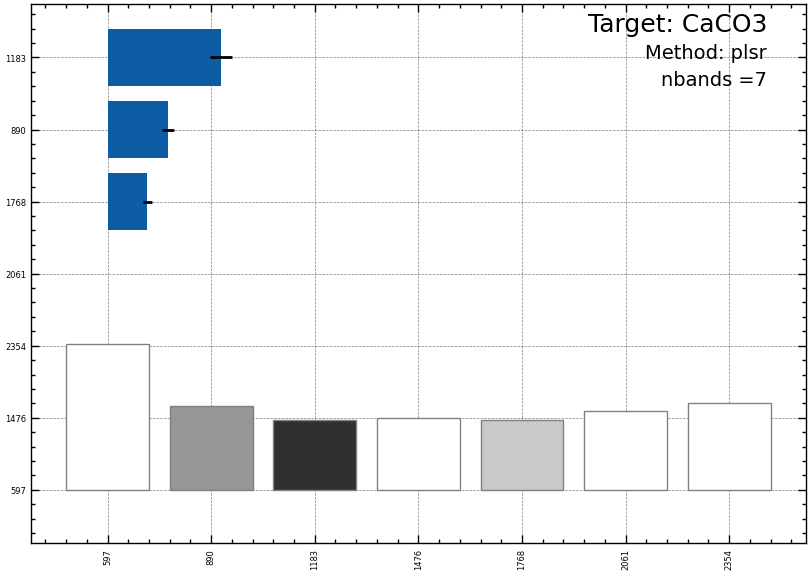

In [96]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_log[7], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_log[7], 'spec_proc': 'log', 'n_bands': 7}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.005, 1, 2)

#### Leave one out

TOC -> [ r2 - **0.61**, Spec - none, n_bands - 10]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the smoothed spectra which is resampled to 10 bands.


In [97]:
CaCO3_model_plsr = PLSRegression(n_components=4, scale=True)
CaCO3_model_plsr.fit(sampled_spec[10],  T[4])

PLSRegression(n_components=4)

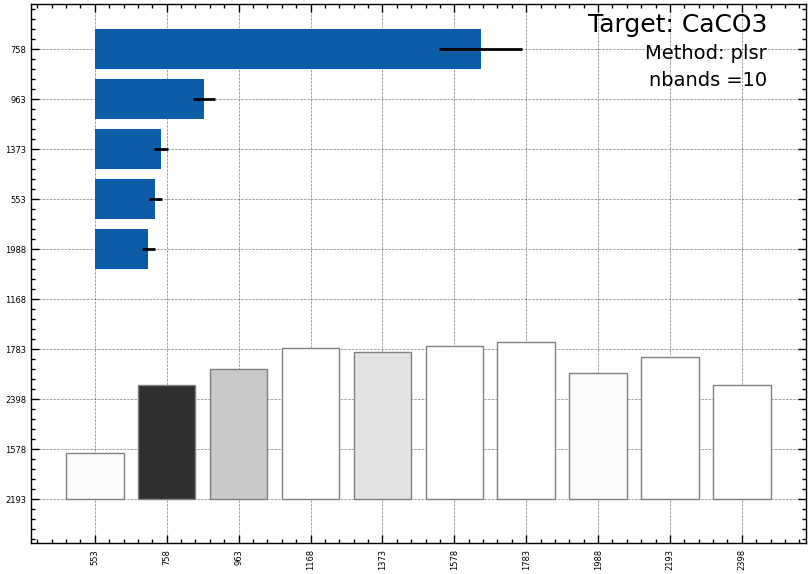

In [98]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, sampled_spec[10], T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': sampled_spec[10], 'spec_proc': 'none', 'n_bands': 10}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.2, 8, 2)

### SVR (CaCO3)

#### Train test

CaCO3 -> [ r2 - **0.62**, Spec - log, n_bands - 100]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 100 bands.


In [99]:
CaCO3_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
CaCO3_model_svr.fit(sampled_log[100],  T[4])

SVR(C=10, gamma=0.01, kernel='linear')

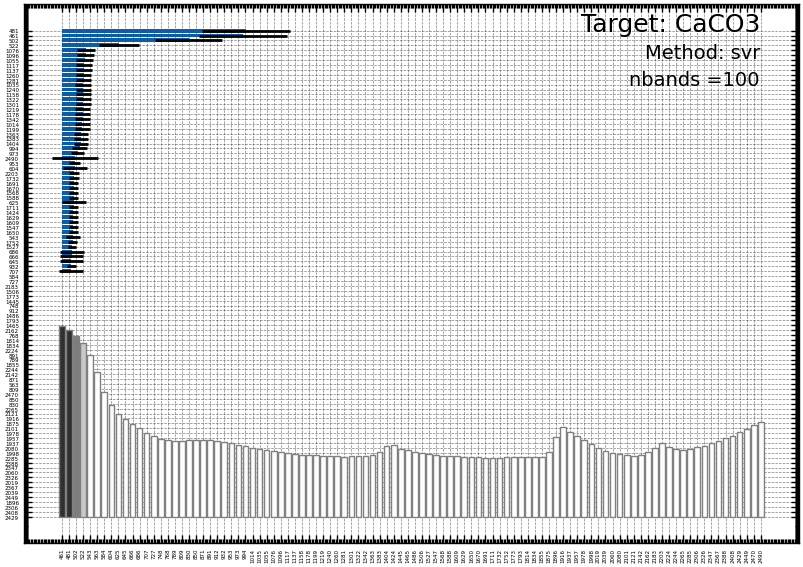

In [100]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_svr, sampled_log[100], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('CaCO3', model_details, feature_scores, 130, 13, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.58**, Spec - log, n_bands - 100]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using svr method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 100 bands.


In [101]:
CaCO3_model_svr = SVR(C = 10, gamma = 0.01, kernel = 'linear')
CaCO3_model_svr.fit(sampled_log[100],  T[4])

SVR(C=10, gamma=0.01, kernel='linear')

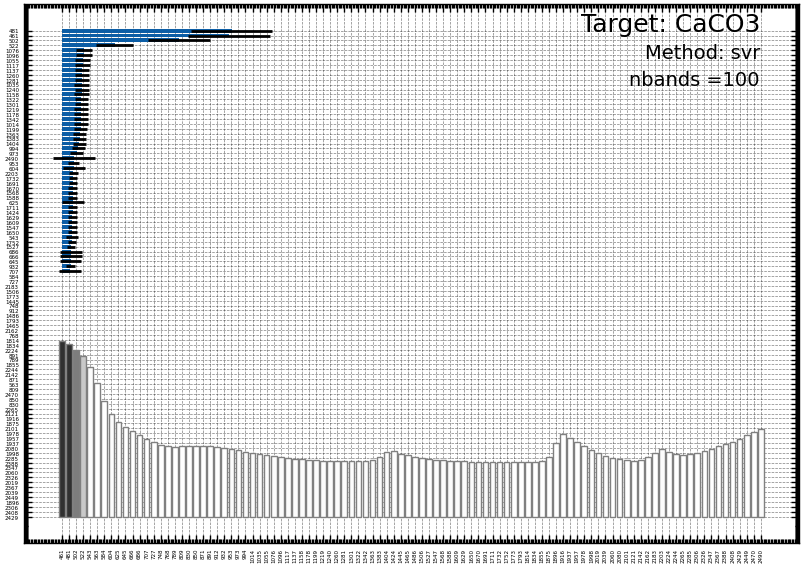

In [102]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_svr, sampled_log[100], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'svr', 'spec': sampled_log[100], 'spec_proc': 'log', 'n_bands': 100}
show_important_features_for ('CaCO3', model_details, feature_scores, 120, 12, 2)

### Kernel Ridge (CaCO3)

#### Train test

CaCO3 -> [ r2 - **0.65**, Spec -none, n_bands - 9]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using kernel ridge regression method method we trained the model on the smoothed spectra which is resampled to 9 bands.


In [103]:
CaCO3_model_kernelridge = KernelRidge(alpha = 0.002) 
CaCO3_model_kernelridge.fit(sampled_spec[9],  T[4])

KernelRidge(alpha=0.002)

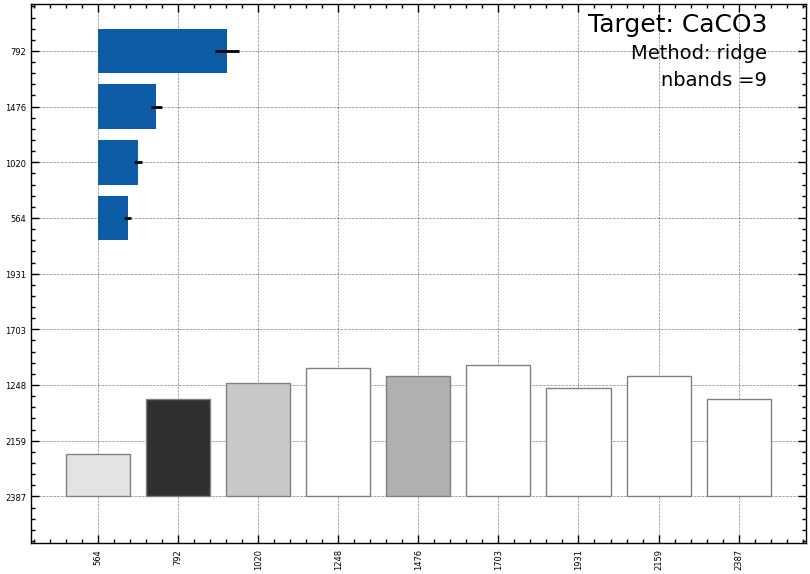

In [104]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_kernelridge, sampled_spec[9], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'ridge', 'spec': sampled_spec[9], 'spec_proc': 'none', 'n_bands': 9}
show_important_features_for ('CaCO3', model_details, feature_scores, 0.06, 6, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.59**, Spec - log, n_bands - 70]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using kernel ridge regression method we trained the model on the logarithmic of the reflectance inverse of the spectra which is resampled to 70 bands.


In [105]:
CaCO3_model_kernelridge = KernelRidge(alpha = 0.05) 
CaCO3_model_kernelridge.fit(sampled_log[70],  T[4])

KernelRidge(alpha=0.05)

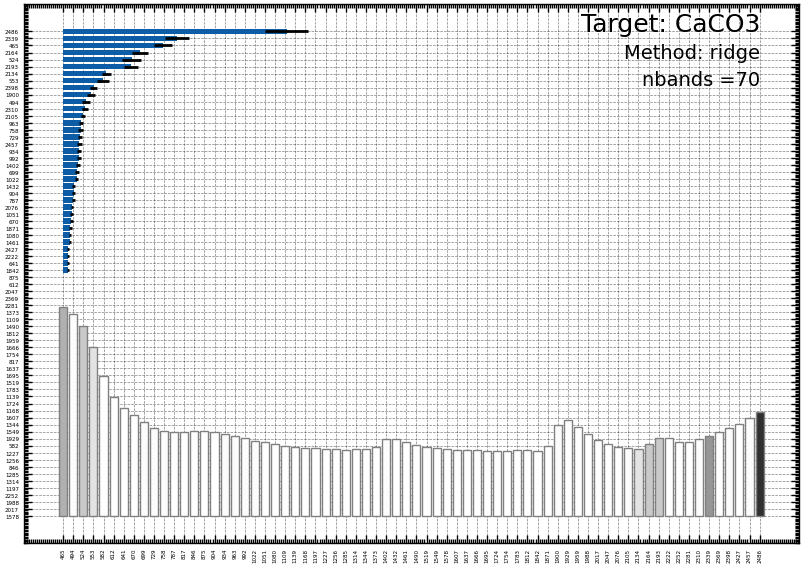

In [106]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_kernelridge, sampled_log[70], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'ridge', 'spec': sampled_log[70], 'spec_proc': 'log', 'n_bands': 70}
show_important_features_for ('CaCO3', model_details, feature_scores, 3, 10, 2)

### Cubist (CaCO3)

#### Train test

CaCO3 -> [ r2 - **0.69**, Spec - fod2, n_bands - 60]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 60 bands.


In [107]:
CaCO3_model_cubist = Cubist(n_committees = 5, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled[60],  T[4])

Cubist(n_committees=5, n_rules=10)

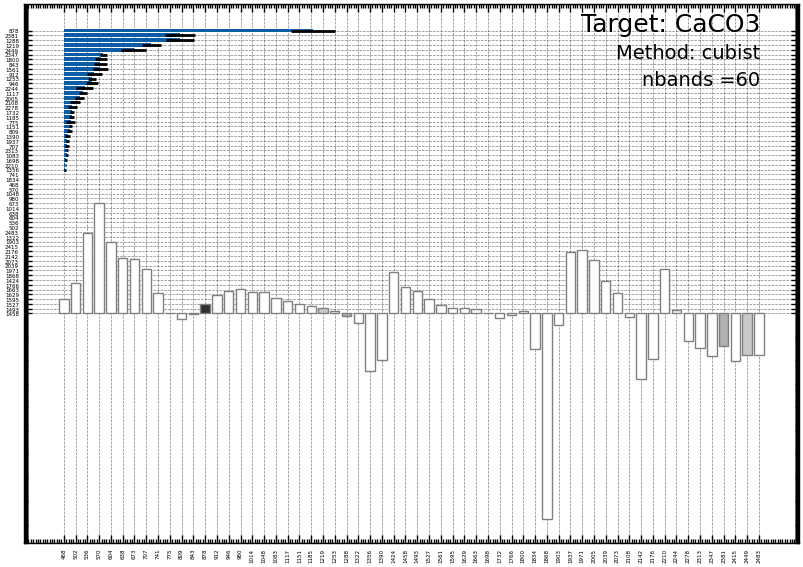

In [108]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled[60], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled[60], 'spec_proc': 'fod2', 'n_bands': 60}
show_important_features_for ('CaCO3', model_details, feature_scores, 30, 400, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative of the smoothed spectra which is resampled to 27 bands.


In [109]:
CaCO3_model_cubist =Cubist(n_committees = 10, n_rules = 10)
CaCO3_model_cubist.fit(fod_sampled[27],  T[4])

Cubist(n_committees=10, n_rules=10)

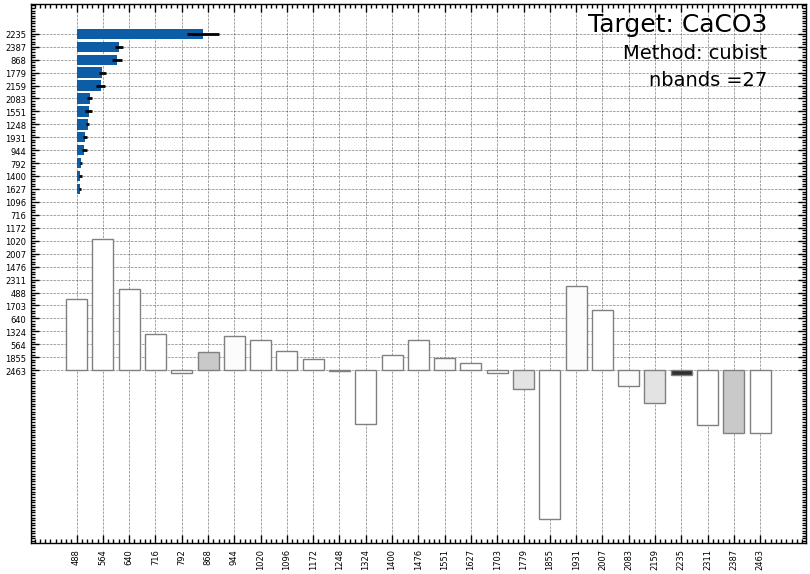

In [110]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_sampled[27], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 8, 100, 2)

### Gradient Boosting Regression Tree (CaCO3)

#### Train test

CaCO3 -> [ r2 - **0.59**, Spec - fod2, n_bands - 35]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 35 bands.


In [111]:
CaCO3_model_gbrt =GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
CaCO3_model_gbrt.fit(fod_sampled[35],  T[4])

GradientBoostingRegressor(n_estimators=50, random_state=42)

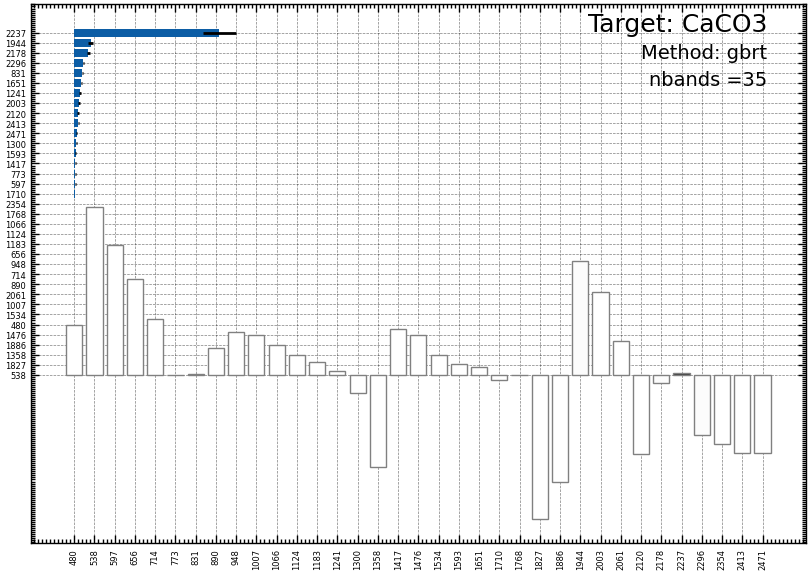

In [112]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, fod_sampled[35], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': fod_sampled[35], 'spec_proc': 'fod2', 'n_bands': 35}
show_important_features_for ('CaCO3', model_details, feature_scores, 10, 200, 2)

#### Leave one out

CaCO3 -> [ r2 - **0.66**, Spec - fod2, n_bands - 27]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using gbrt method we trained the model on the first order derivative of the smoothed spectra which is resampled to 27 bands.


In [113]:
CaCO3_model_gbrt =GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 50, random_state = 42)
CaCO3_model_gbrt.fit(fod_sampled[27],  T[4])

GradientBoostingRegressor(n_estimators=50, random_state=42)

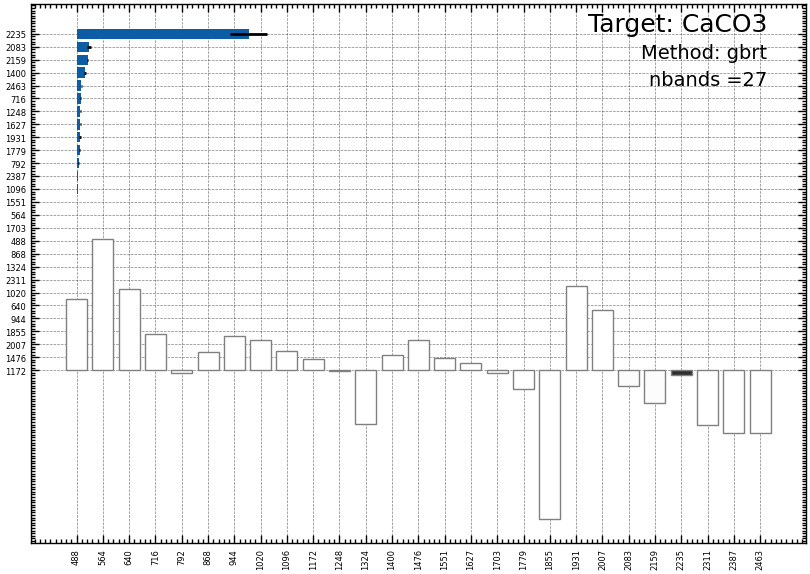

In [114]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, fod_sampled[27], T[4], n_repeats=10, random_state=0)
model_details['CaCO3'] = {'method': 'gbrt', 'spec': fod_sampled[27], 'spec_proc': 'fod2', 'n_bands': 27}
show_important_features_for ('CaCO3', model_details, feature_scores, 8, 100, 2)